## Процесс решения задачи

Решение почти любой DS задачи в продуктовой аналитике можно разбить на следующие этапы:
1) Проанализировать задачу, понять к какому виду и классу обучения она относится. Вместе с бизнесом выбрать метрику

2) EDA (exploratory data analysis) - процесс когда мы изучаем качество данных, признаки, их распределение и связь с целевой(целевыми переменными)

3) Предобработка данных (обработка пропусков, кодирование/создание новых признаков, очистка данных от выбросов и т.д.)

4) Обучение и оптимизация моделей

5) Валидация результатов

## Данные и задача

Рассмотрим все этапы выше на примере задачи предсказания оттока пользователя. 

Ссылка на данные: https://www.kaggle.com/c/customer-churn-prediction-2020/data



In [26]:
!pip freeze requiements.txt

anyio==4.3.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.2.2
cffi==1.16.0
charset-normalizer==3.3.2
cloudpickle==3.0.0
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.51.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
idna==3.7
ipykernel==6.29.4
ipython==8.24.0
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==2.4
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.1
jupyter_core==5.7.2
jupyter_server==2.14.0
jupyter_server_terminals==0.5.3
jupyterlab==4.1.8
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.1
kiwisolver==1.4.5
llvmlite==0.42.0
MarkupSafe==2.1.5
matplotlib==3.8.4
matplotlib-inline==0.1.7
mistune==3.0.2
nbclient==0.10

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [160]:
train_data = pd.read_csv('LTV.csv')

train_data.sample(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8442,HR28499,California,3890.964154,No,Extended,Bachelor,1/1/11,Employed,M,43578,...,46,0,1,Personal Auto,Personal L1,Offer2,Agent,105.662175,Two-Door Car,Medsize
5192,ZT31931,Oregon,10377.368420,No,Extended,High School or Below,2/7/11,Unemployed,M,0,...,69,0,2,Personal Auto,Personal L2,Offer2,Web,579.452318,Two-Door Car,Medsize
4801,DL61016,Oregon,4940.508153,No,Basic,College,2/20/11,Employed,M,65985,...,47,5,4,Special Auto,Special L1,Offer2,Agent,42.431310,Four-Door Car,Medsize
3037,CT18212,California,6874.848270,No,Extended,Bachelor,2/17/11,Unemployed,F,0,...,27,0,6,Personal Auto,Personal L2,Offer4,Agent,691.200000,Four-Door Car,Medsize
8072,AU11344,Oregon,5142.389806,No,Extended,Bachelor,1/15/11,Employed,F,35666,...,76,0,1,Personal Auto,Personal L2,Offer2,Call Center,312.110029,SUV,Small
3558,SU86402,Arizona,6568.758770,No,Extended,High School or Below,1/30/11,Disabled,F,25876,...,46,0,3,Personal Auto,Personal L3,Offer1,Branch,398.400000,Two-Door Car,Medsize
1752,LF41085,Arizona,5635.249486,No,Basic,College,1/22/11,Medical Leave,F,19591,...,79,0,4,Personal Auto,Personal L2,Offer1,Agent,95.925021,Two-Door Car,Medsize
7143,KU59569,California,7714.623619,No,Basic,College,2/25/11,Unemployed,F,0,...,90,0,8,Personal Auto,Personal L3,Offer2,Agent,763.200000,Sports Car,Medsize
301,IM94808,Nevada,5395.831967,No,Basic,Bachelor,2/28/11,Employed,M,70051,...,69,0,8,Corporate Auto,Corporate L3,Offer4,Web,42.078345,Four-Door Car,Medsize
5555,SZ64974,Arizona,5104.354719,No,Basic,Doctor,1/31/11,Employed,M,77025,...,44,2,3,Personal Auto,Personal L1,Offer1,Agent,380.917107,Two-Door Car,Medsize


In [161]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [178]:
X = train_data.drop('Customer Lifetime Value', axis = 1)
y = train_data['Customer Lifetime Value']

## Выделим численные признаки от остальных

In [80]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [81]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

In [82]:
train_data[num_cols].describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Построим графики, посмотрим на распределение признаков

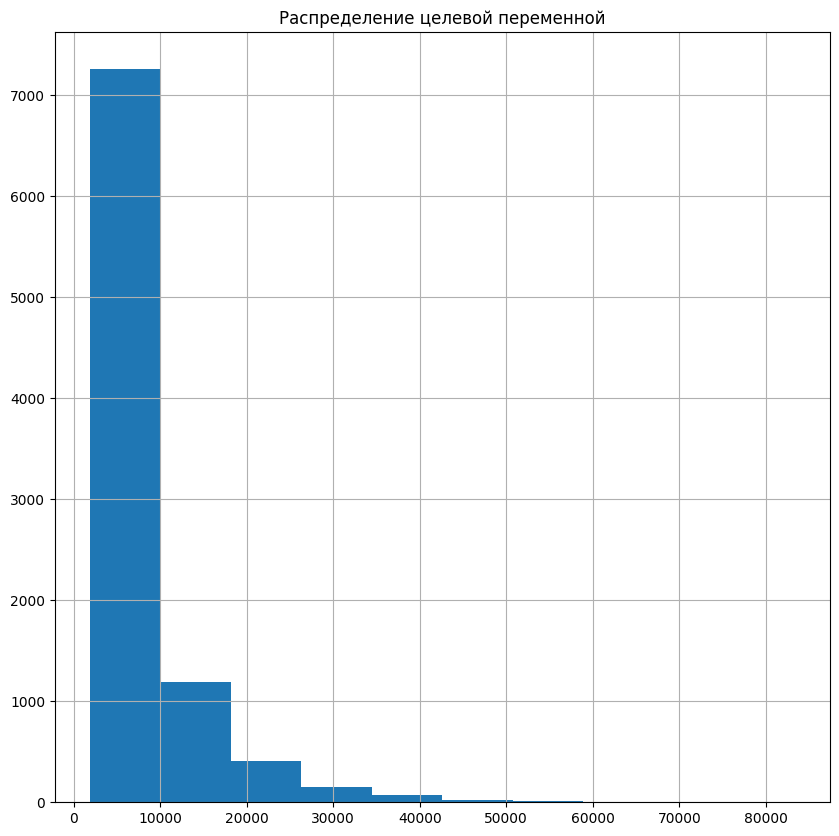

In [83]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

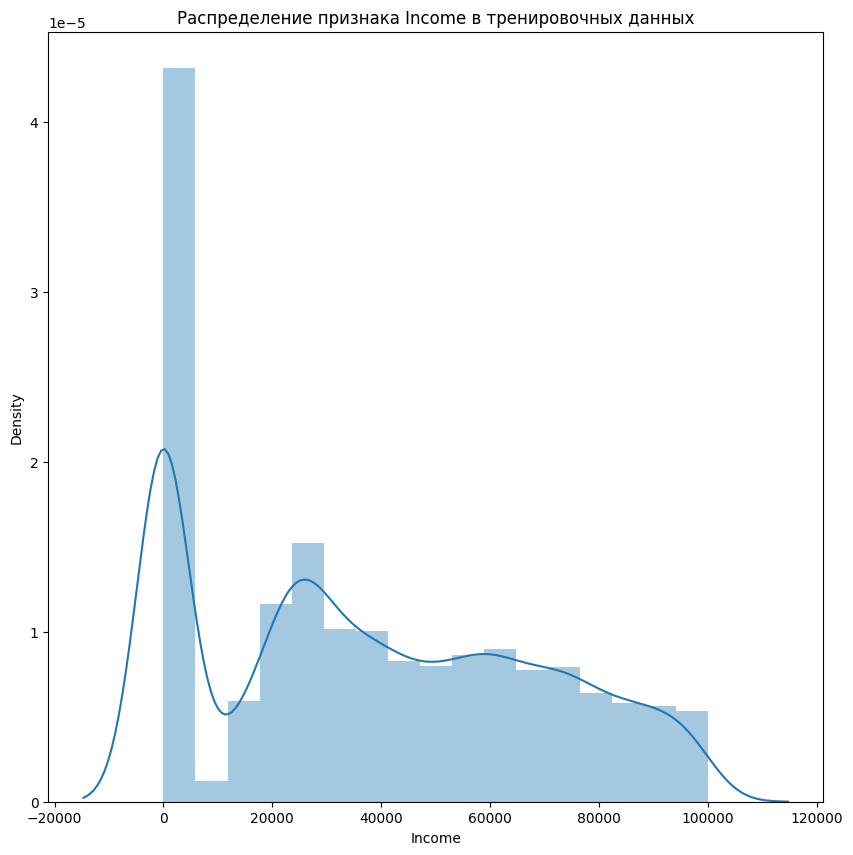

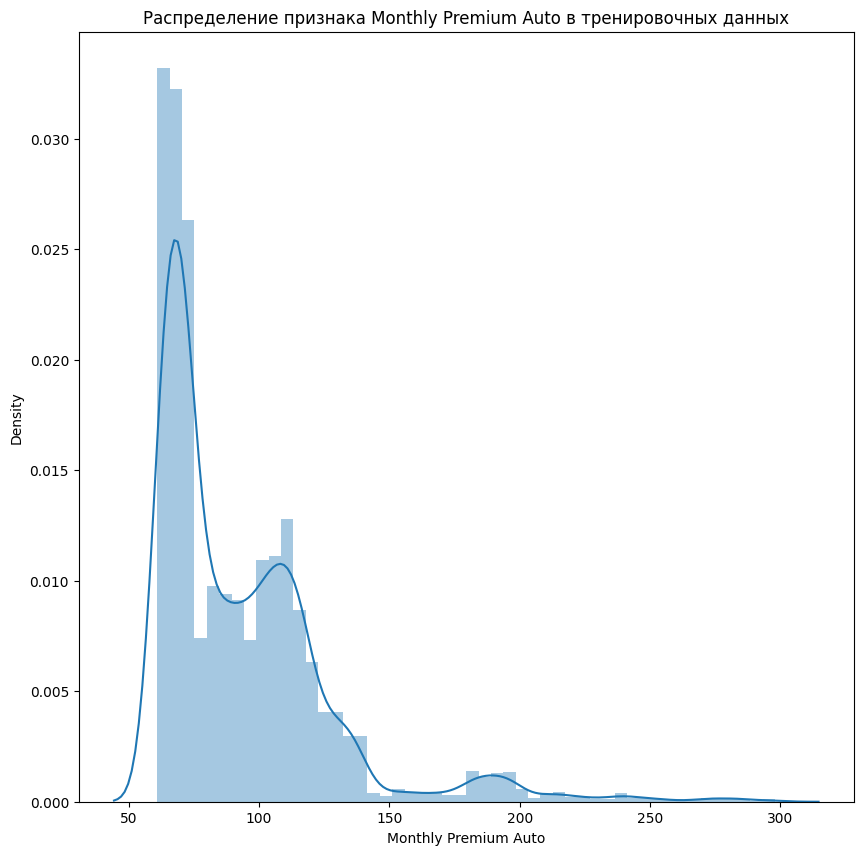

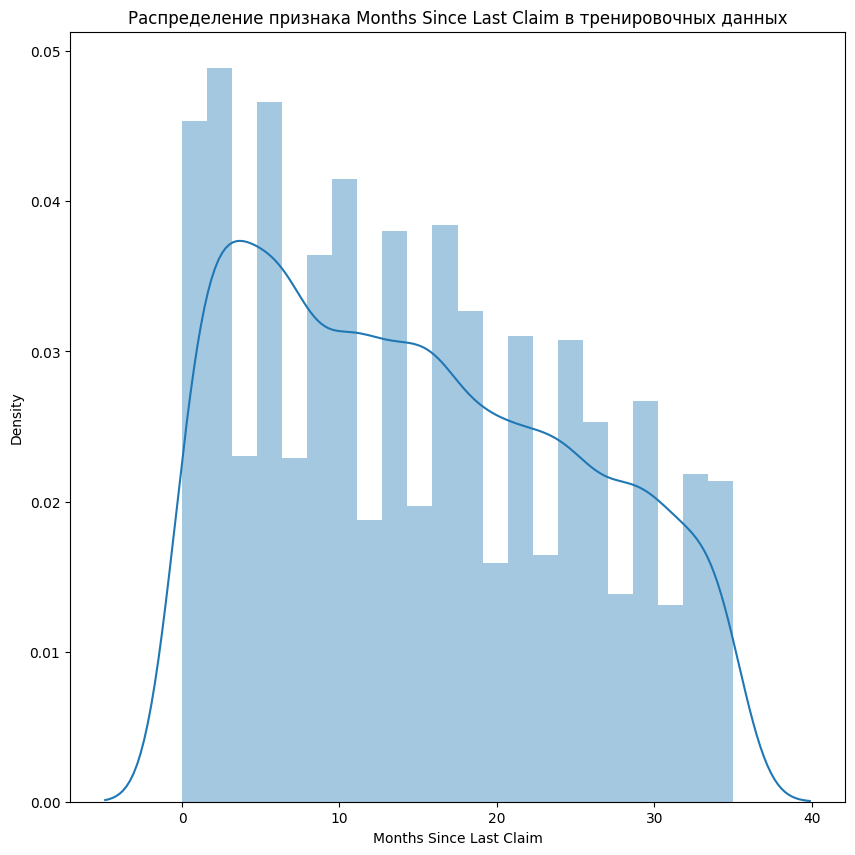

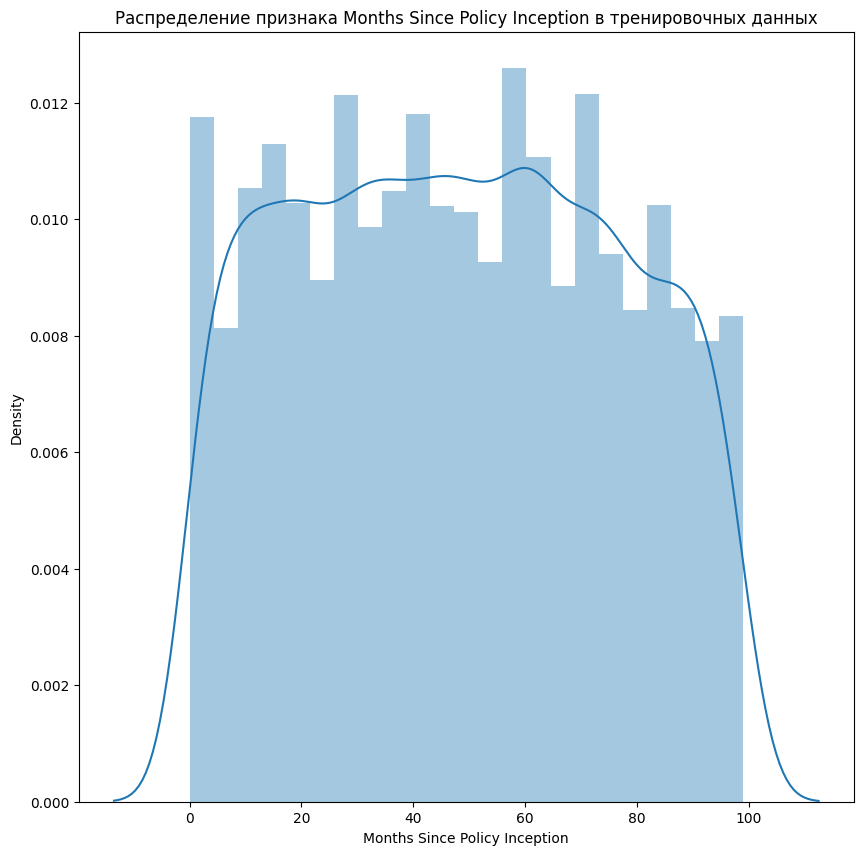

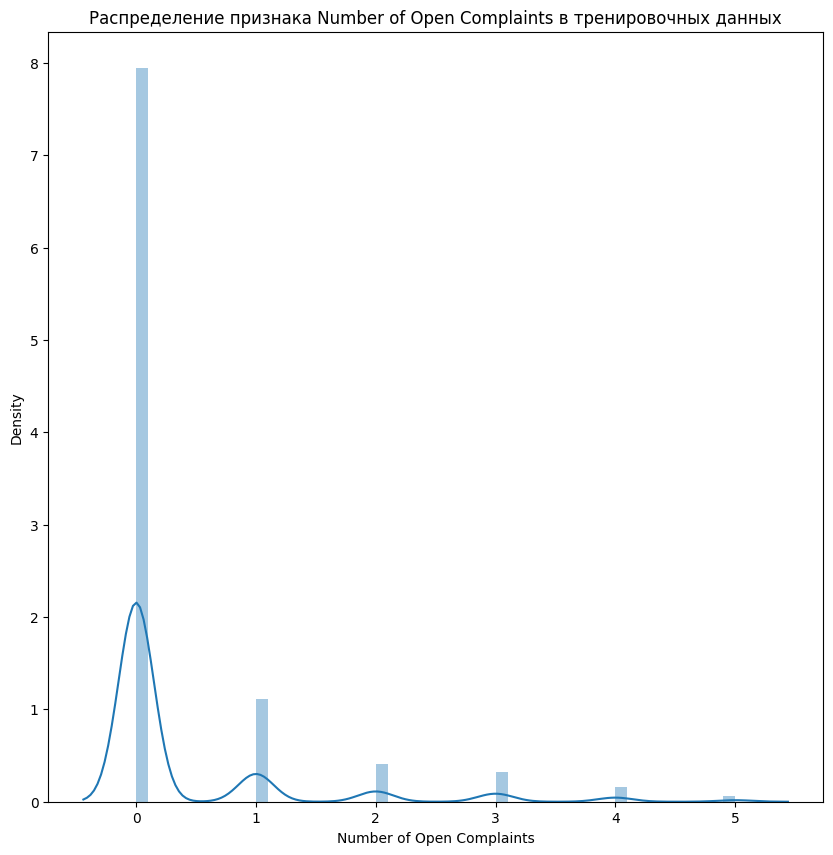

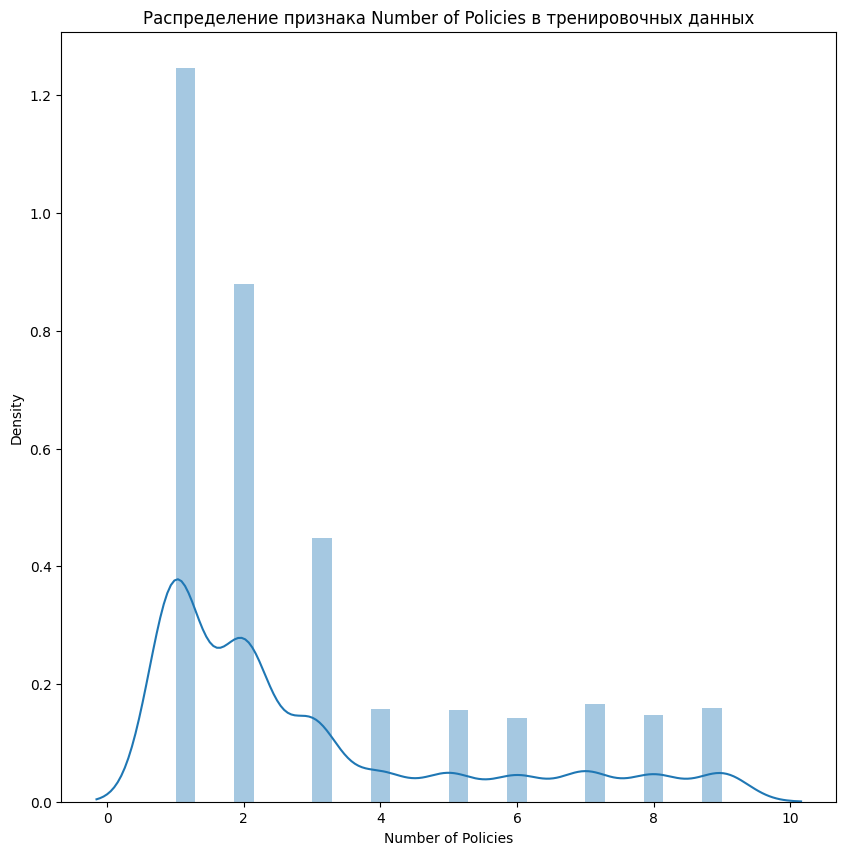

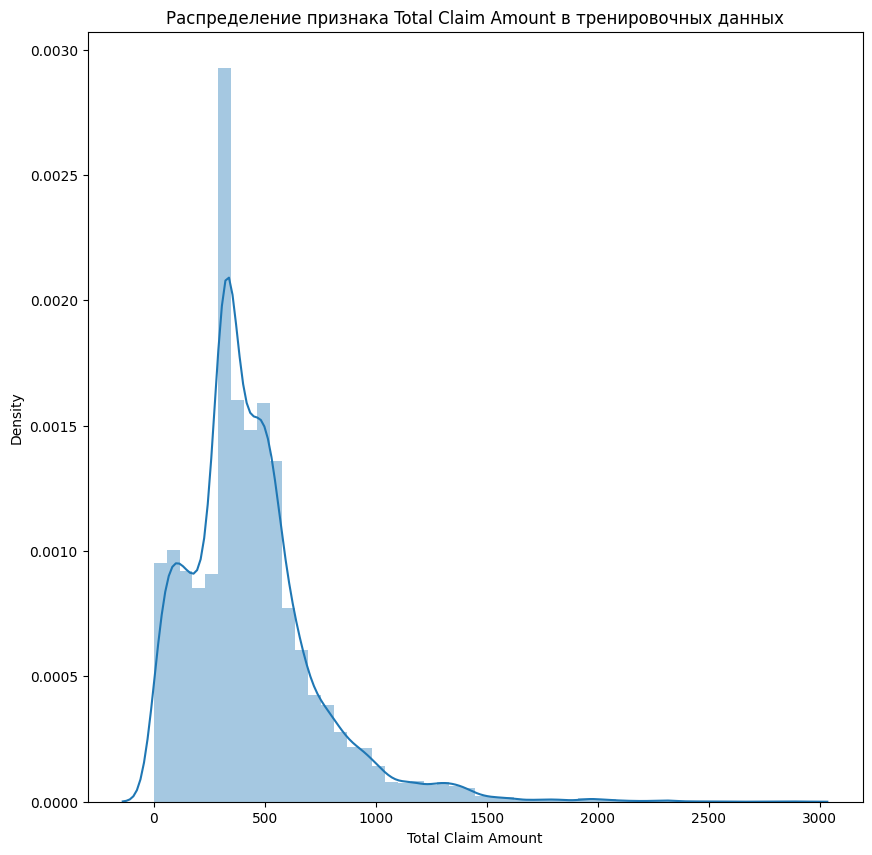

In [84]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

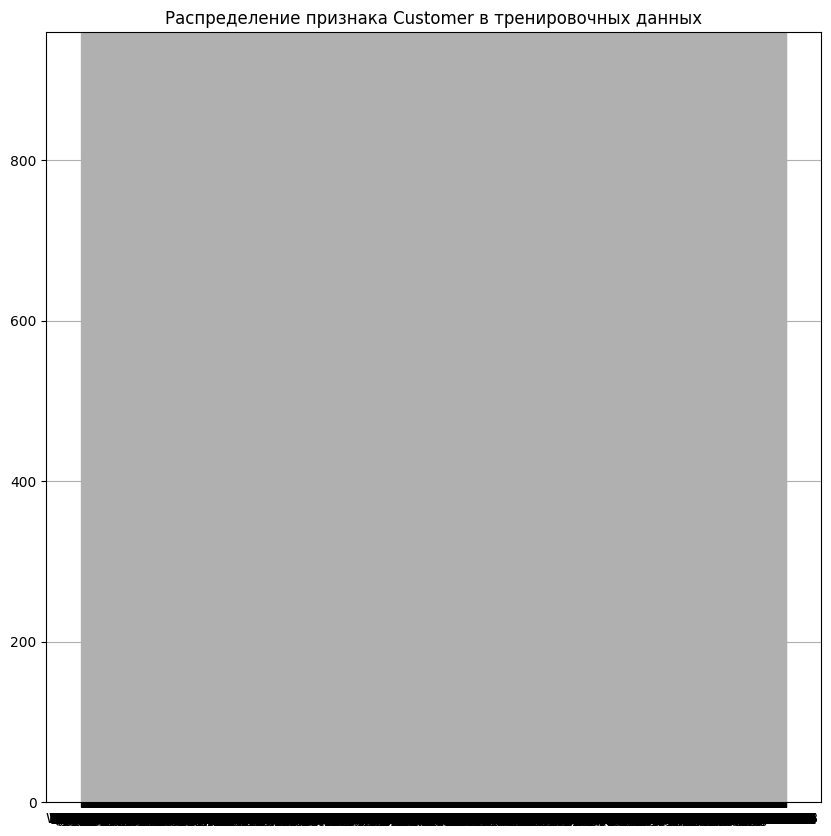

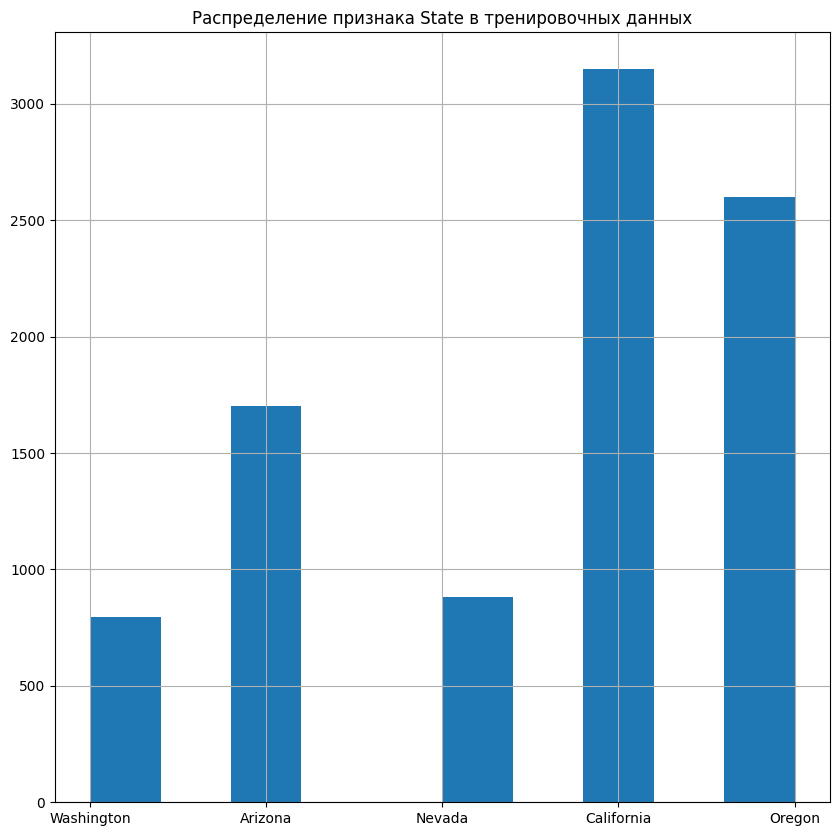

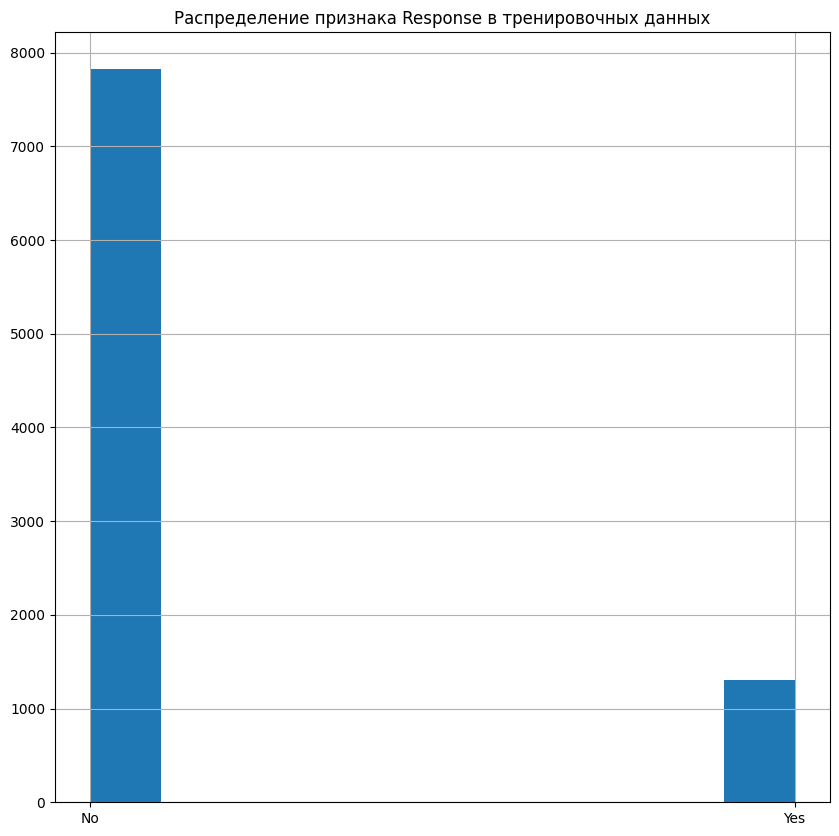

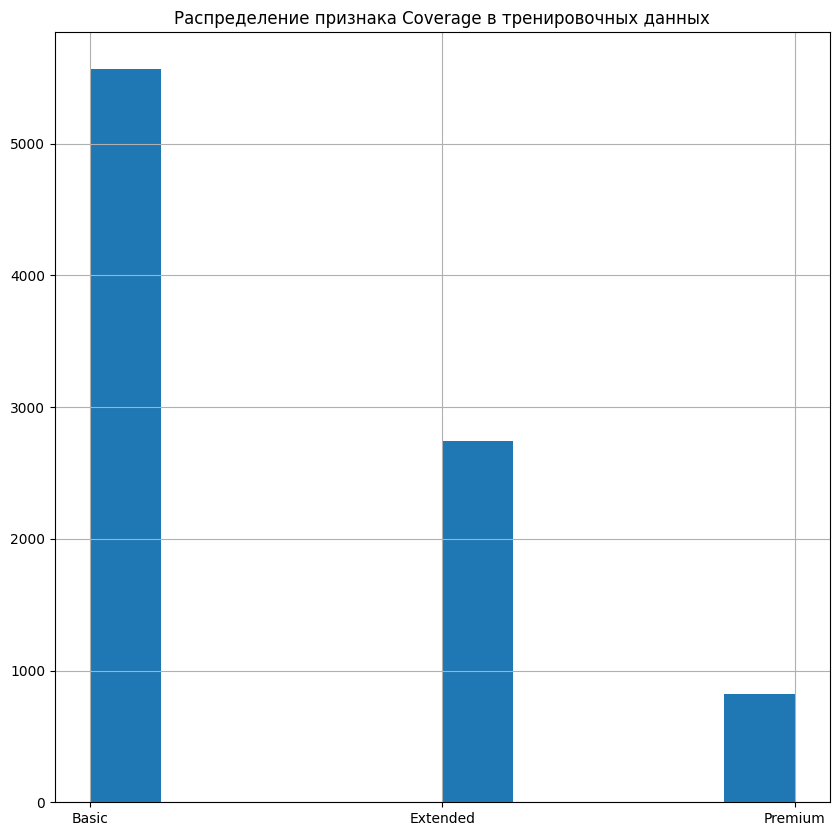

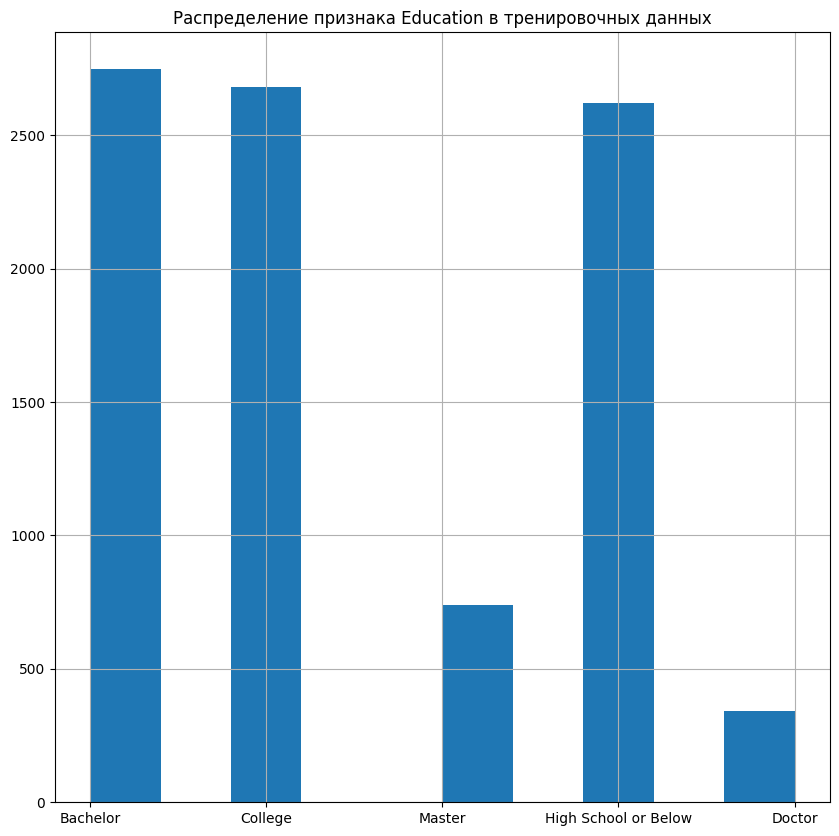

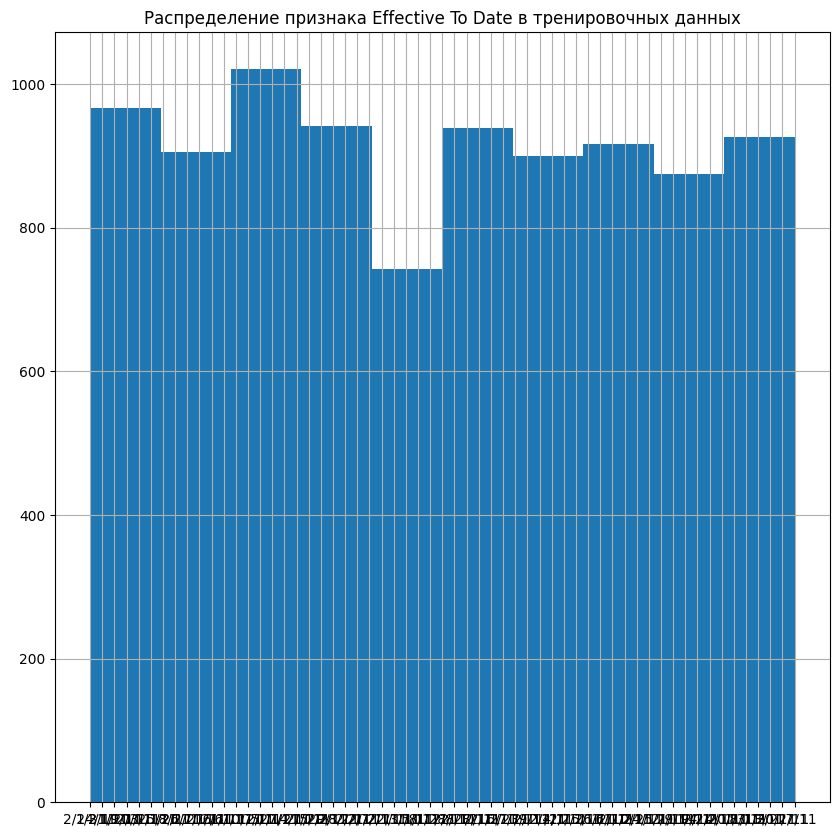

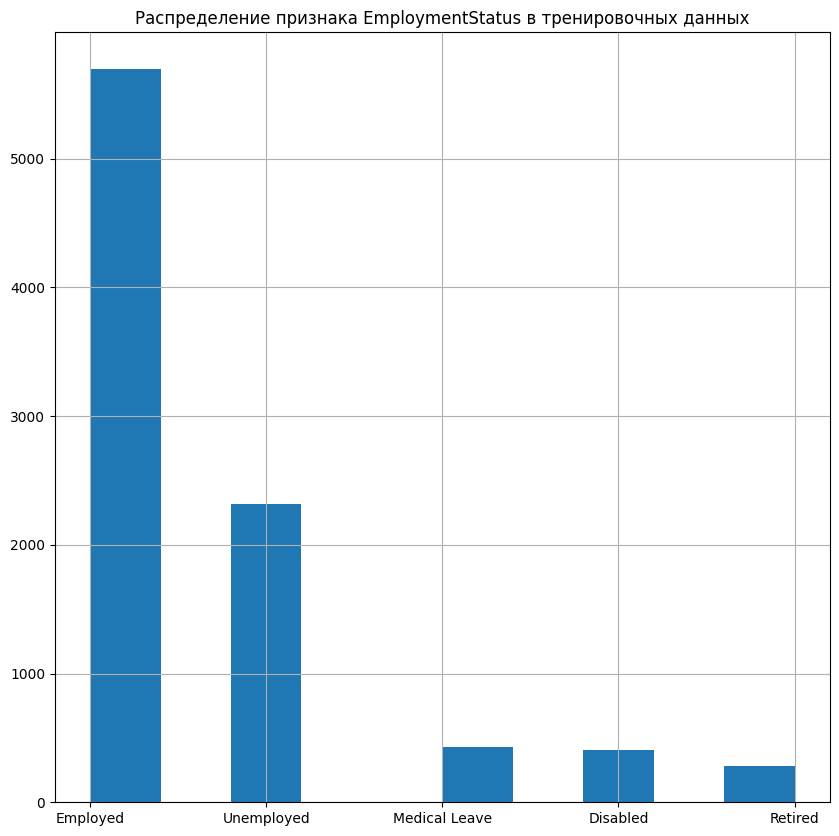

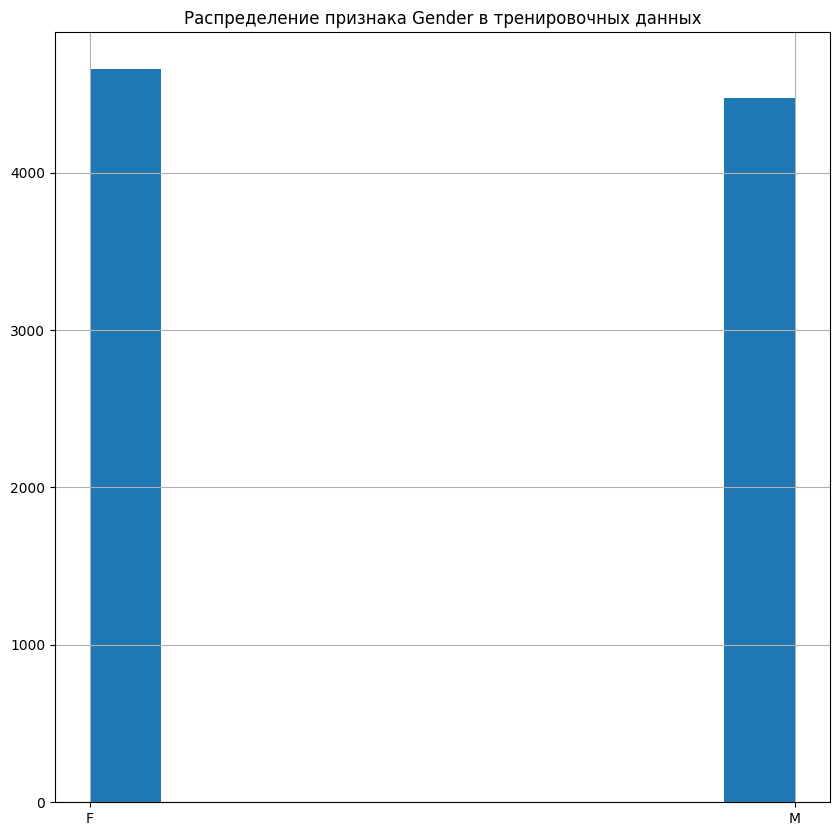

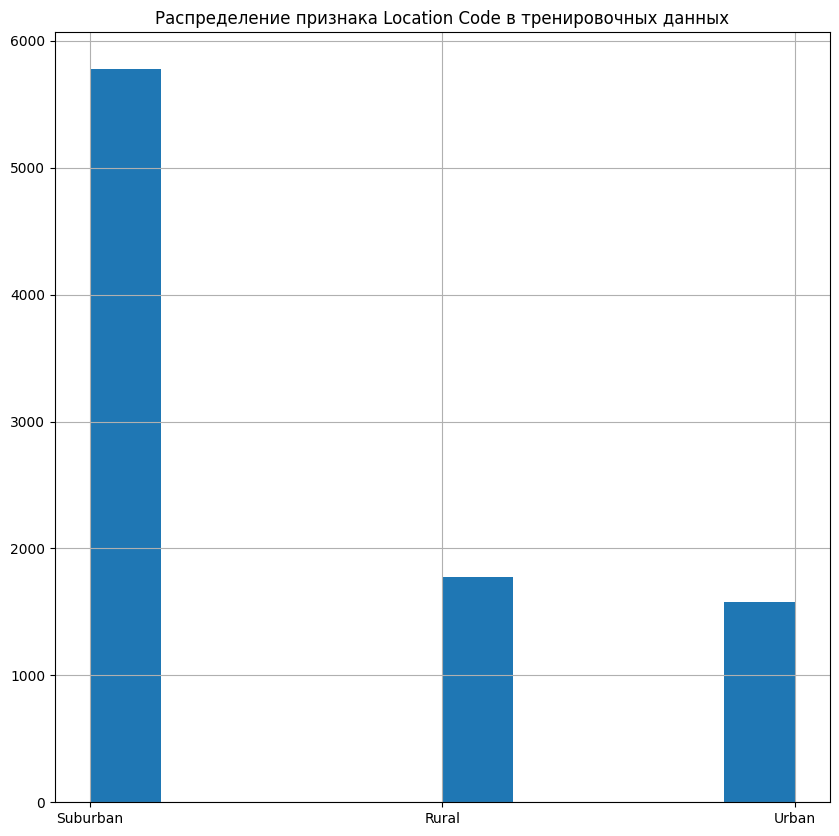

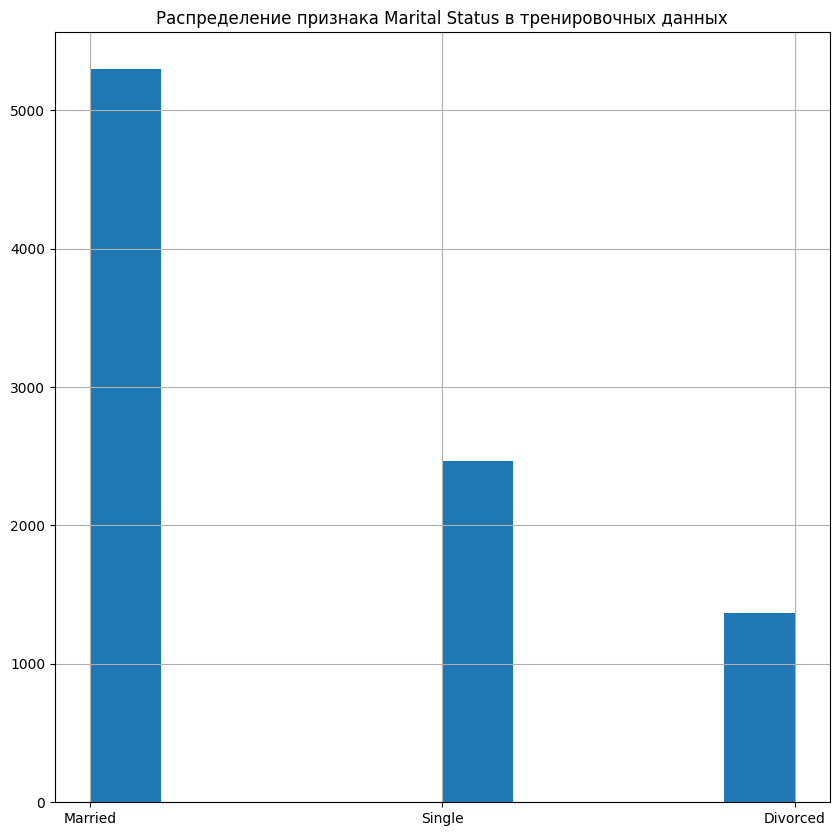

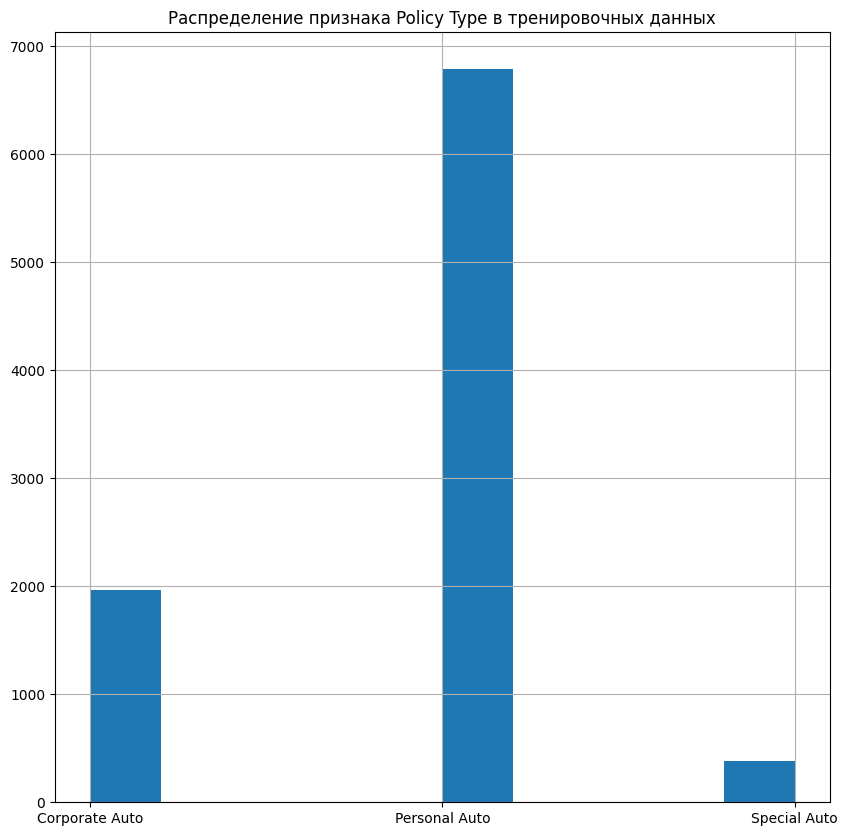

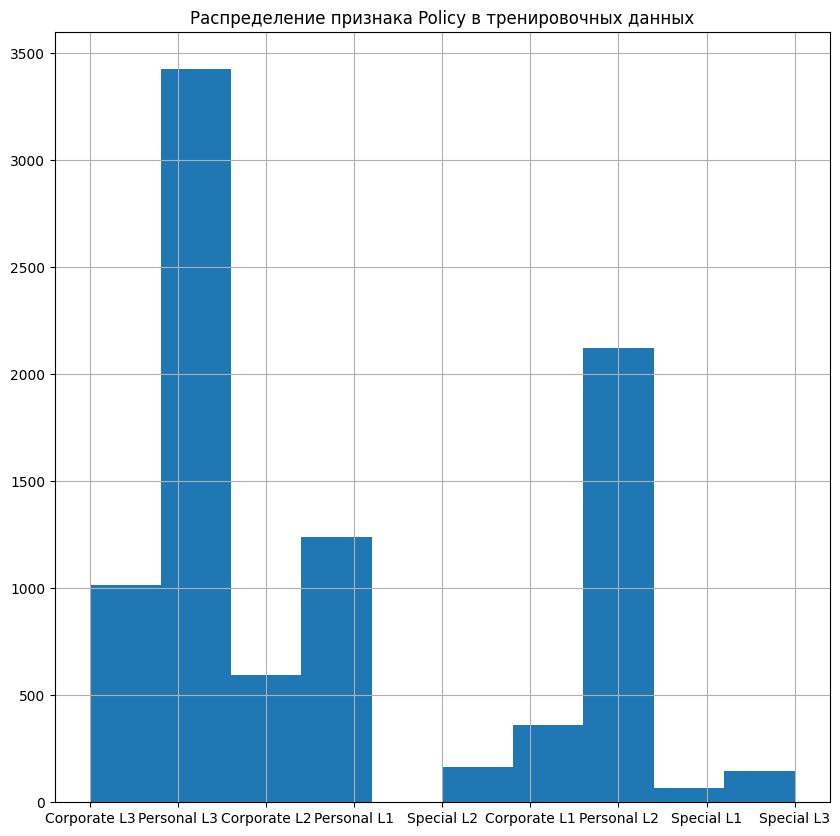

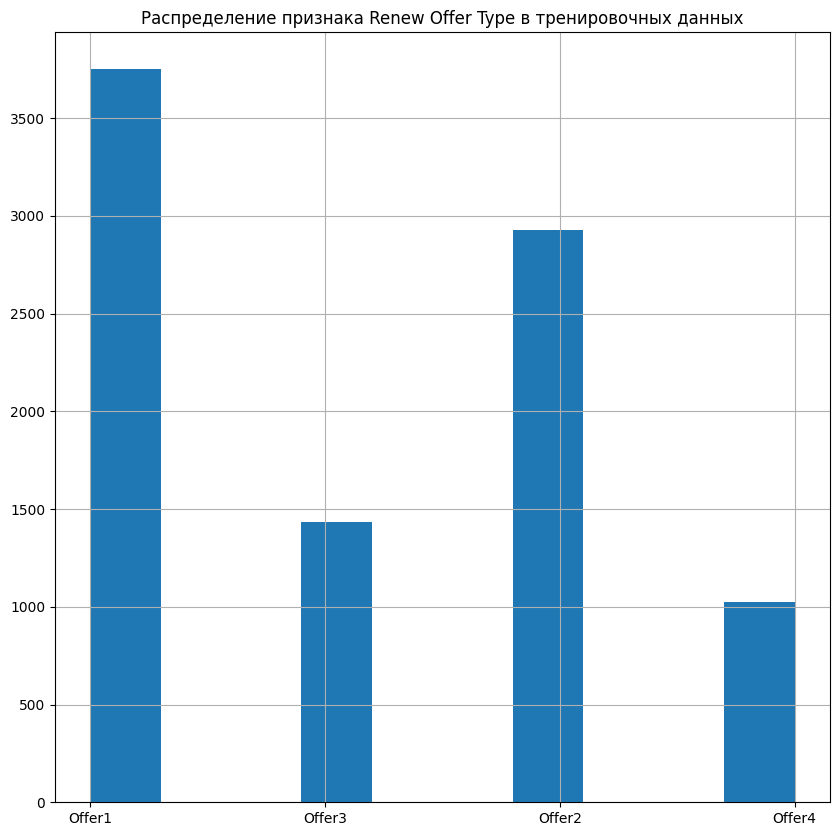

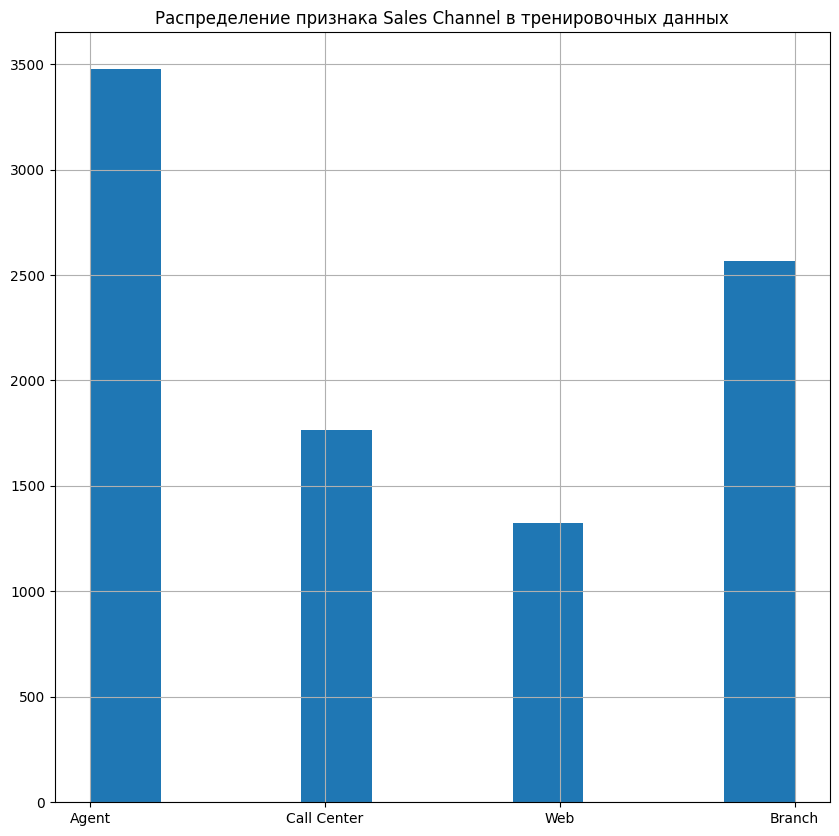

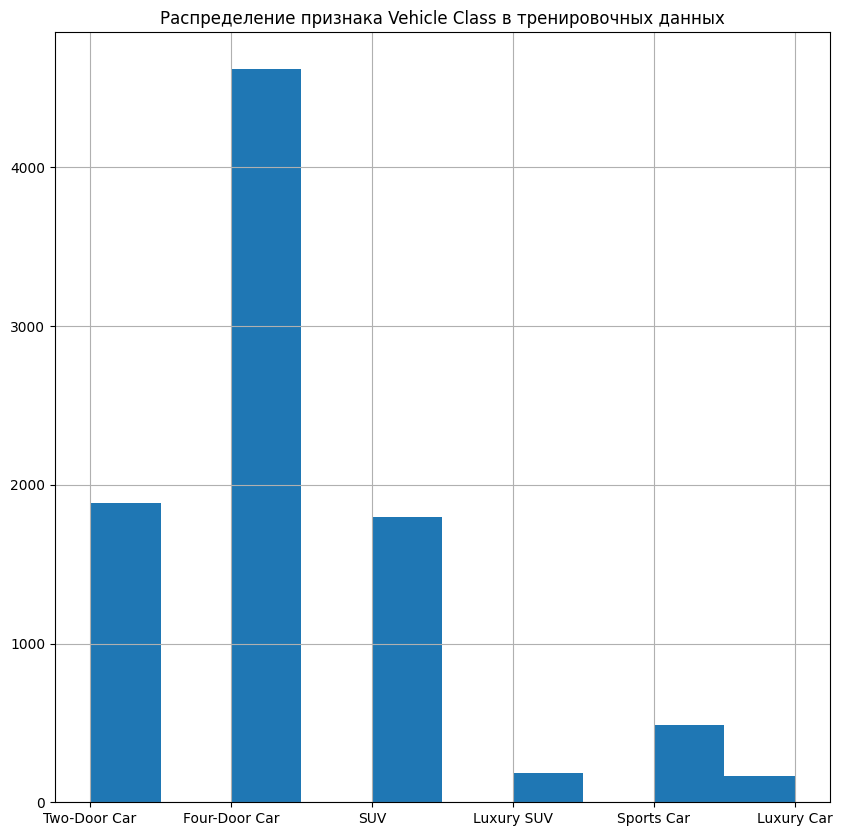

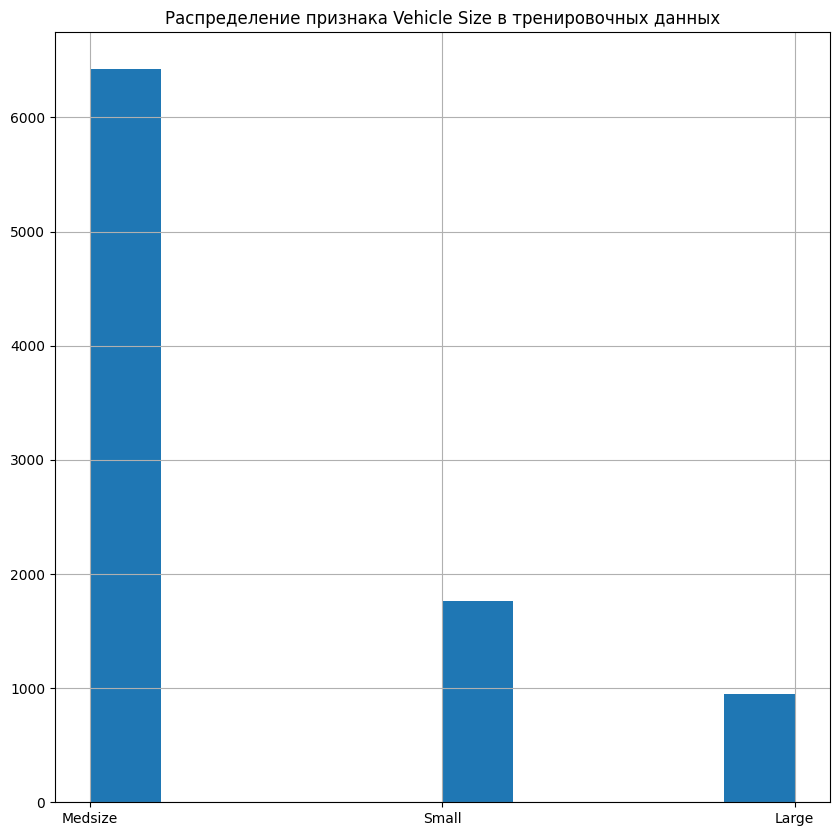

In [85]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

## Сравнение мужчин и женщин

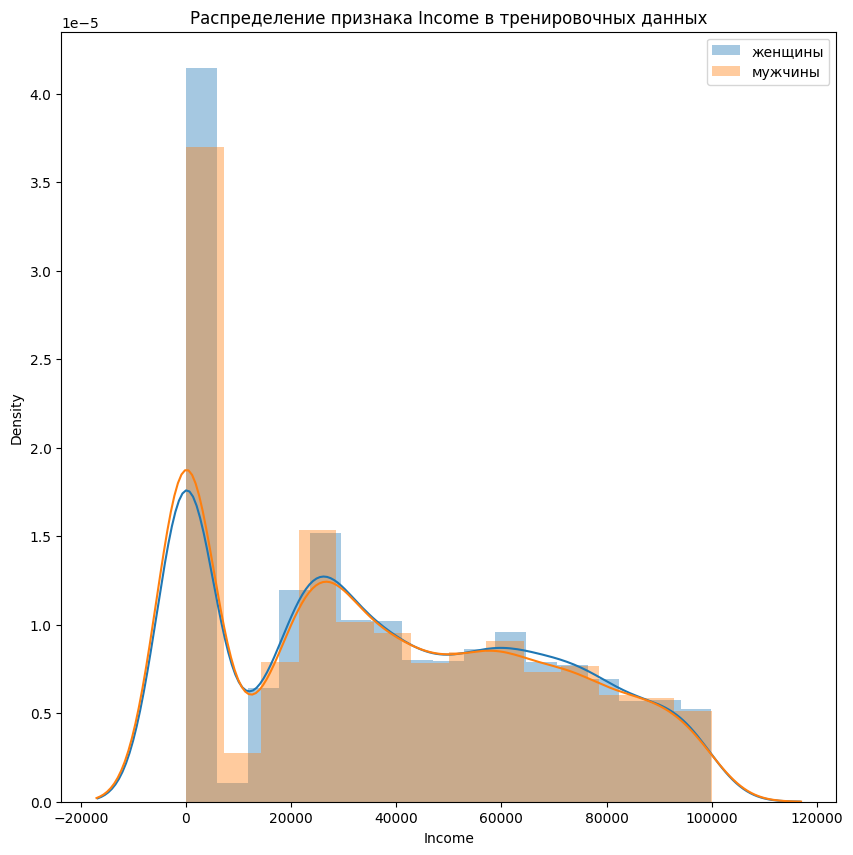

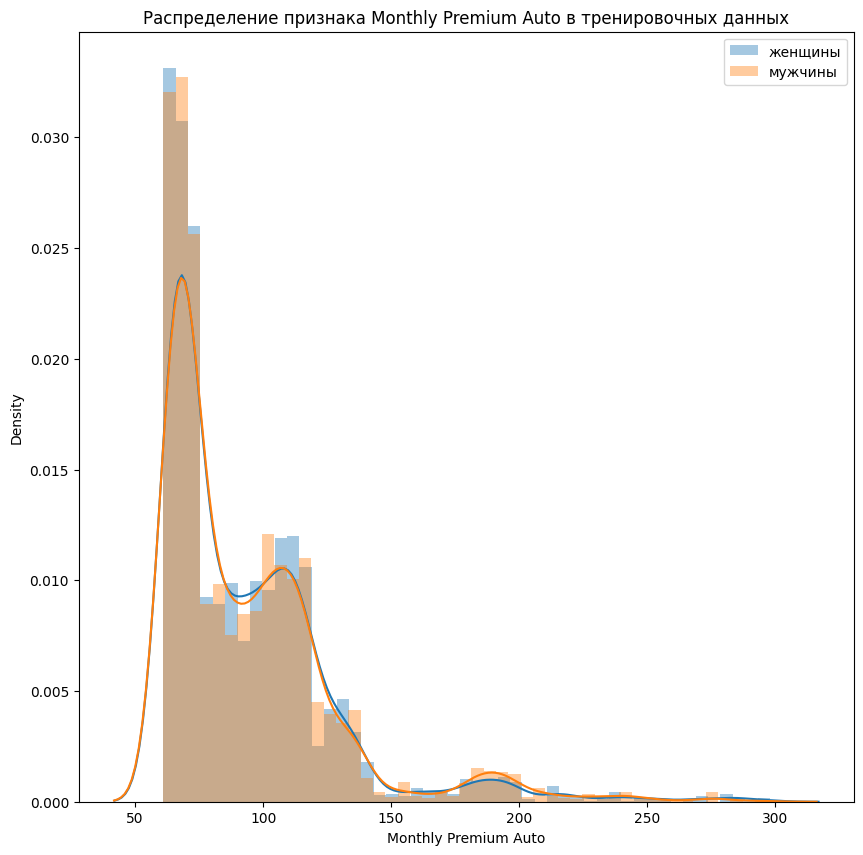

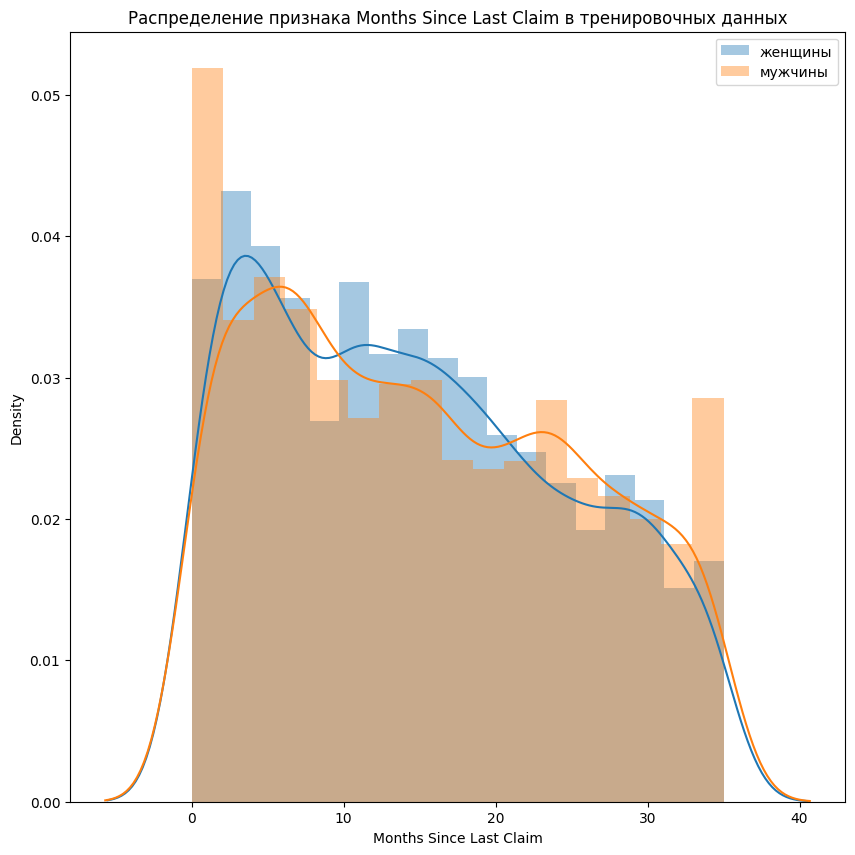

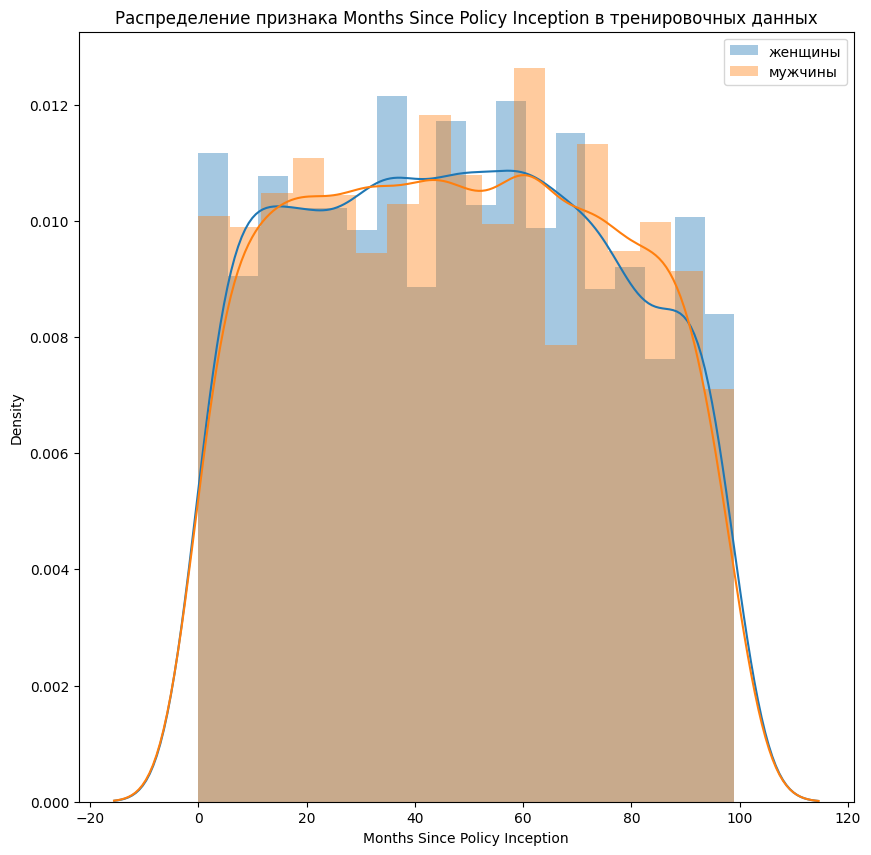

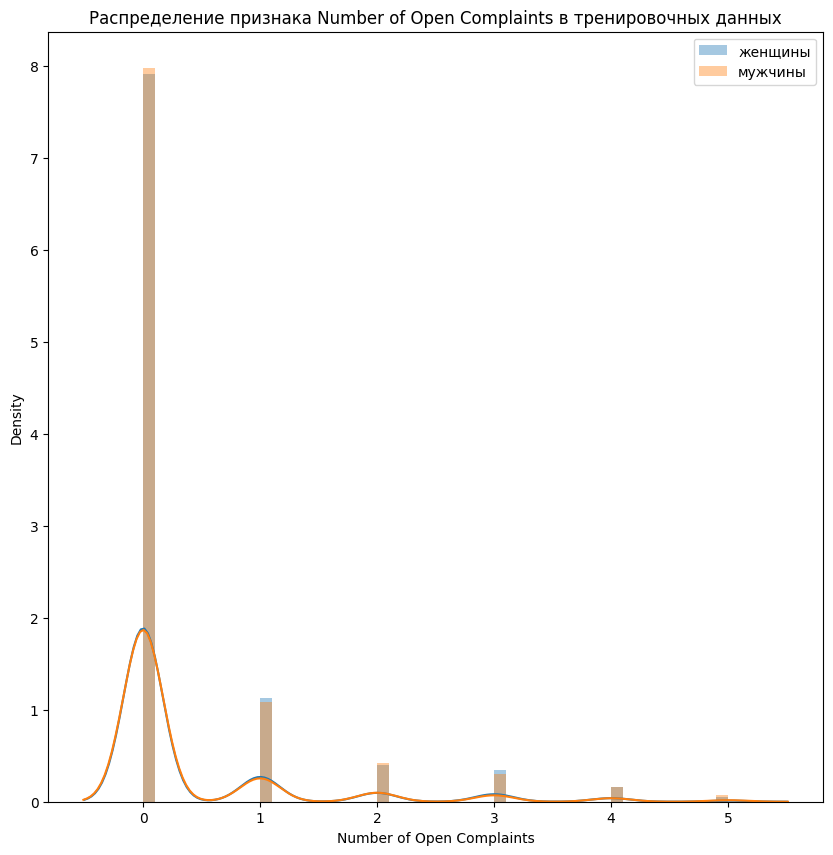

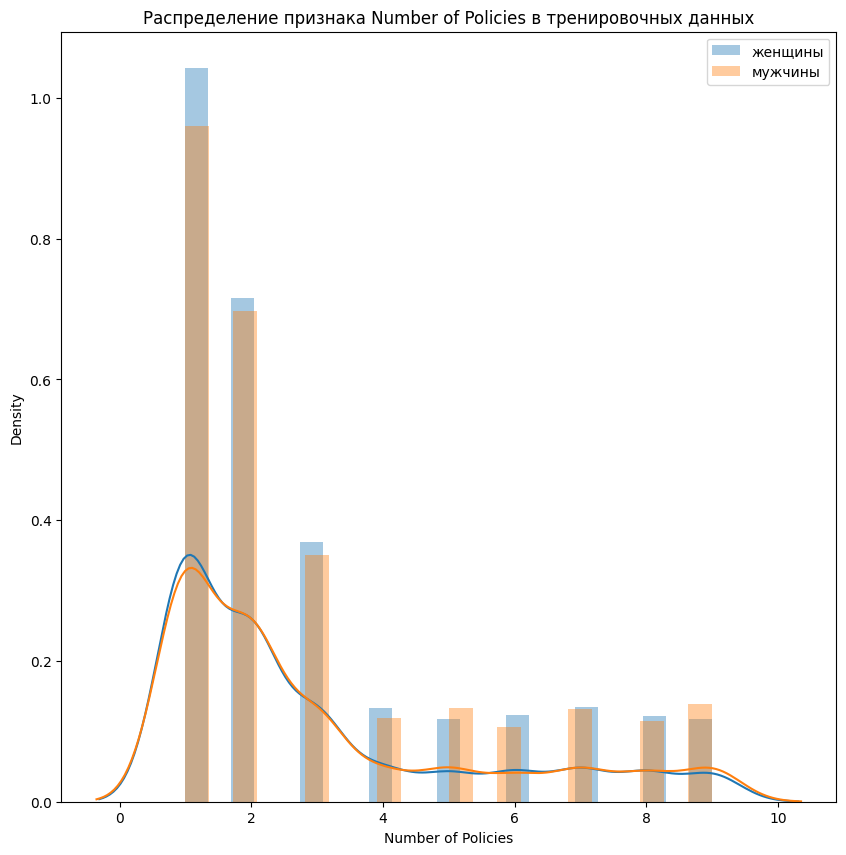

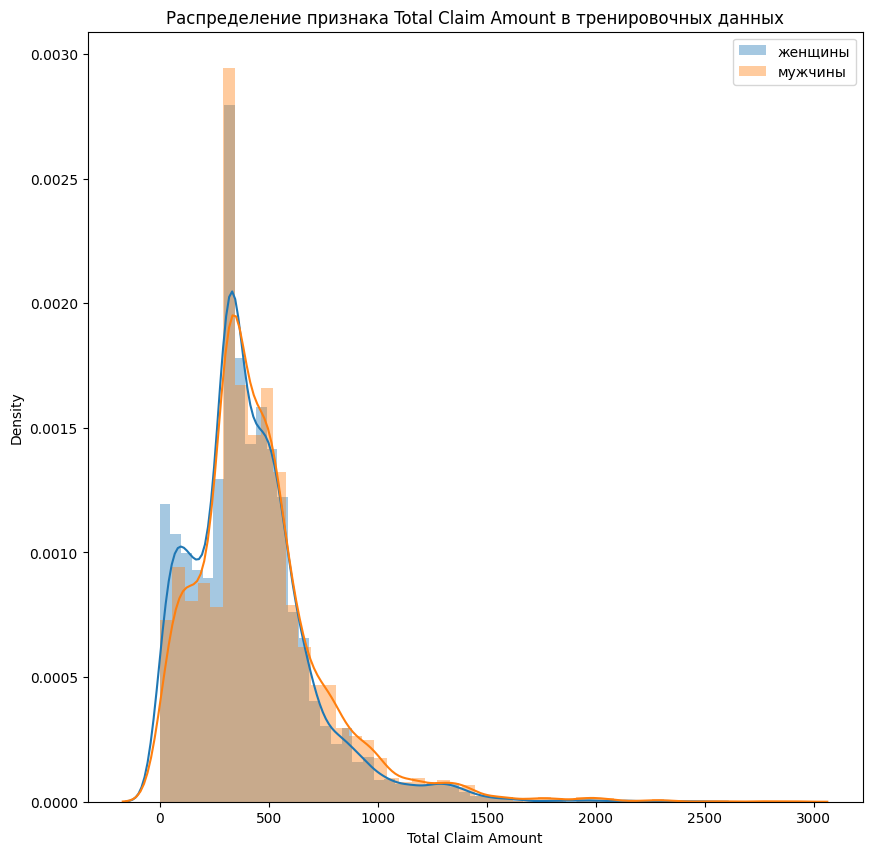

In [86]:
femaly = train_data[train_data['Gender'] == 'F']
man = train_data[train_data['Gender'] == 'M']


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(femaly[col], label = 'женщины')
    sns.distplot(man[col], label = 'мужчины')   
    plt.legend()

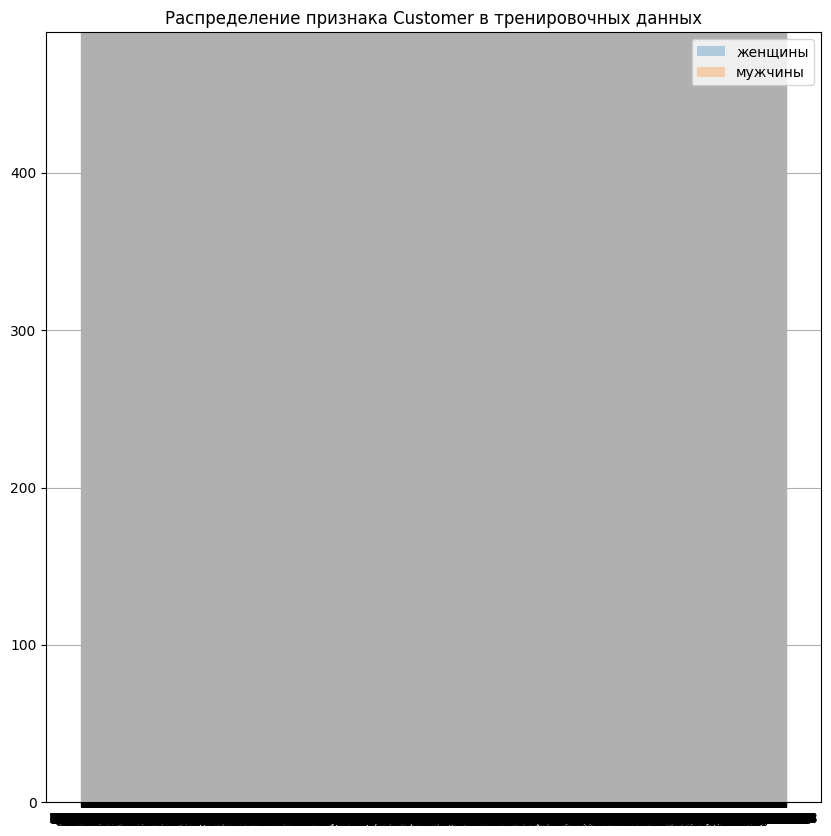

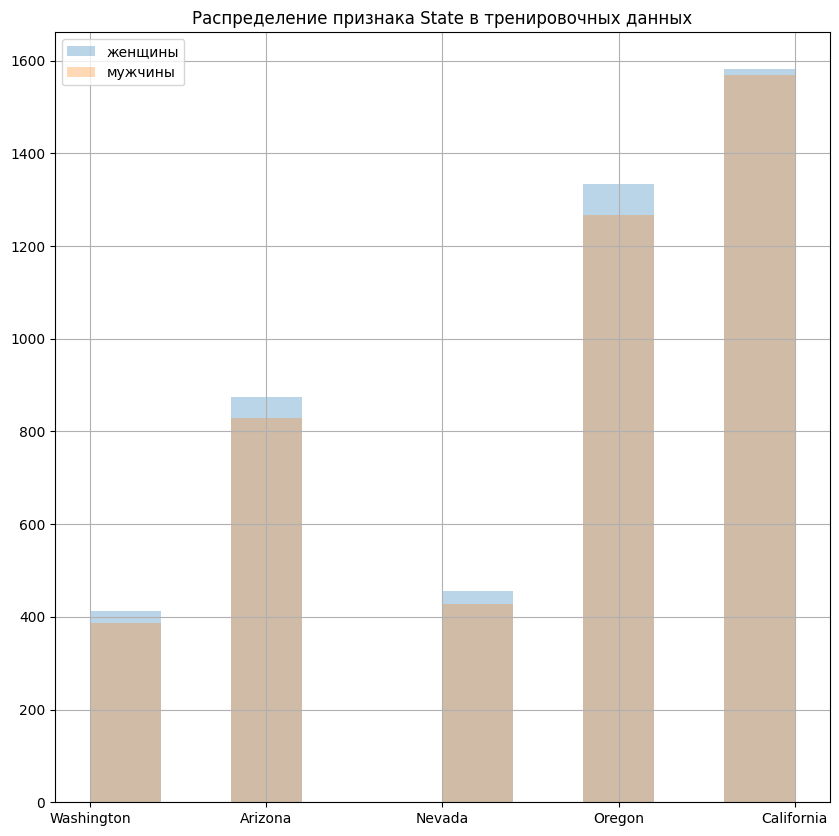

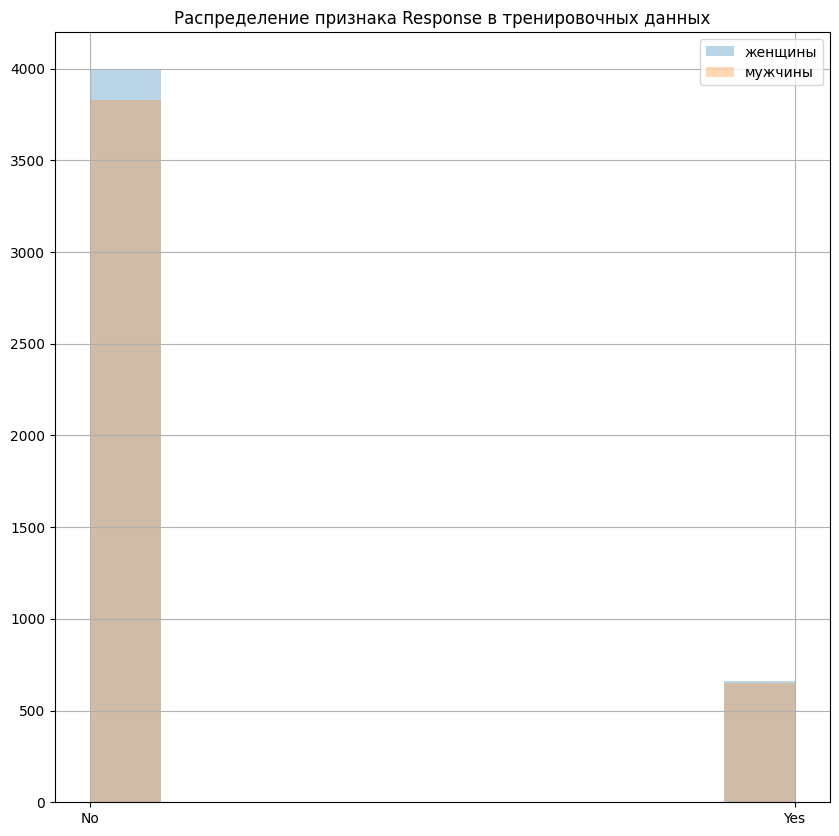

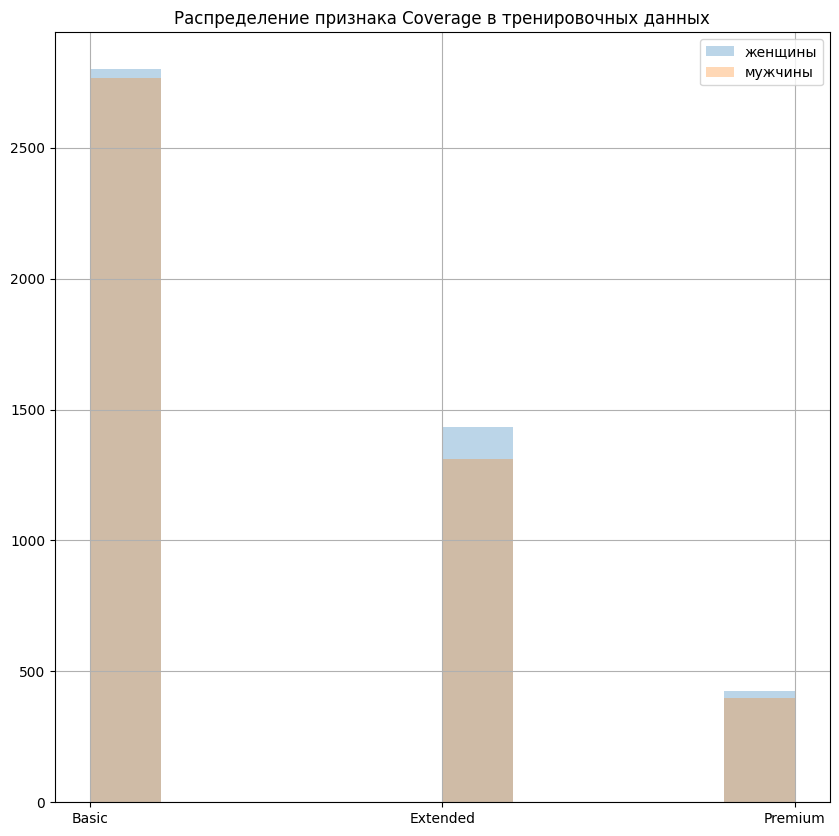

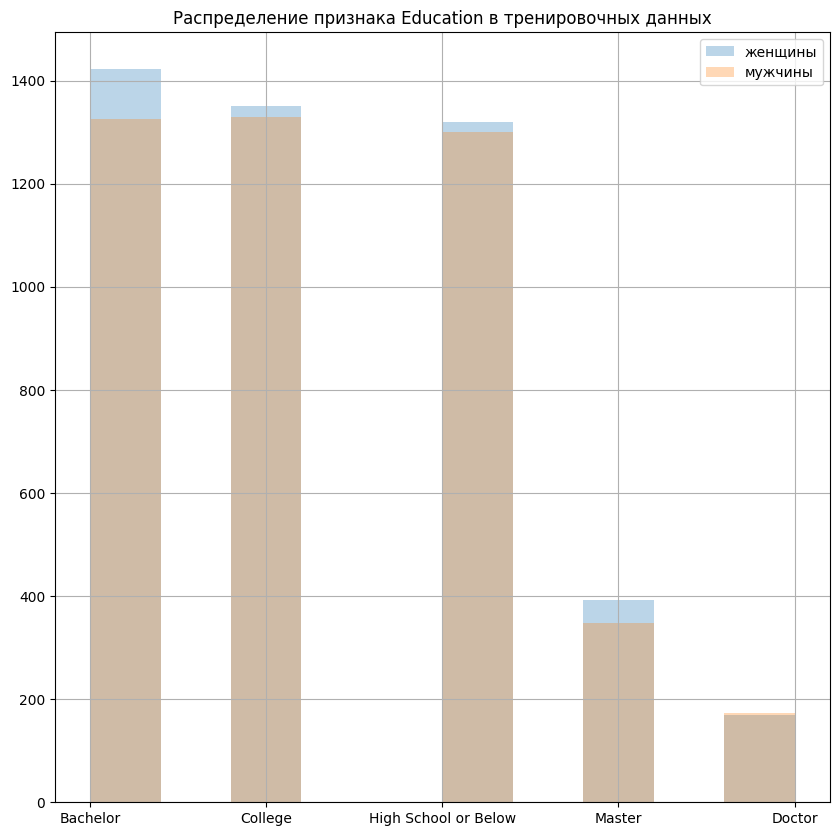

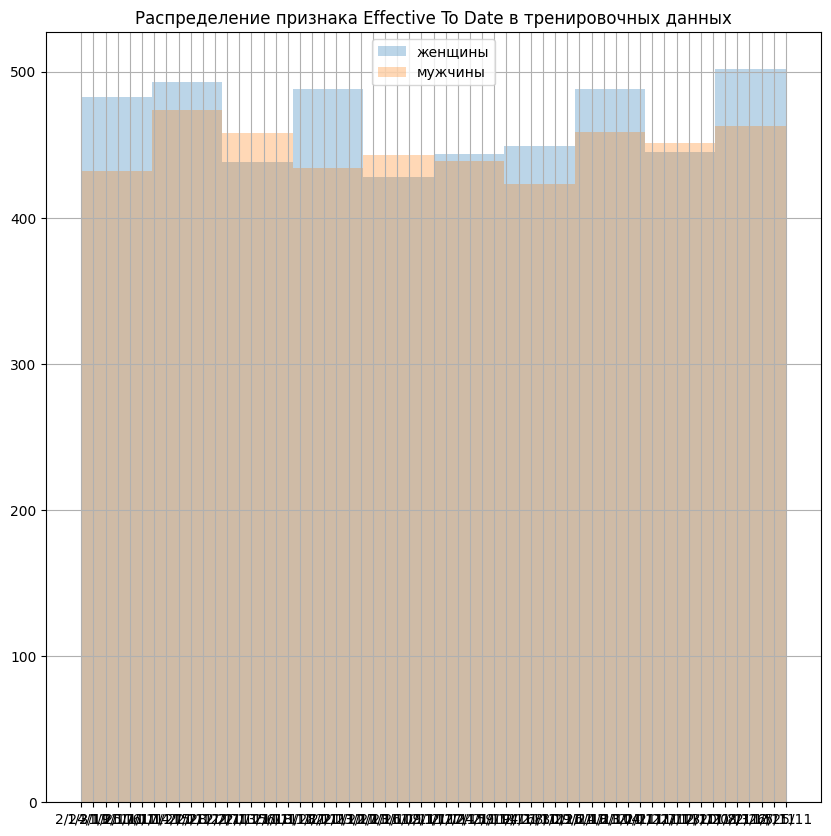

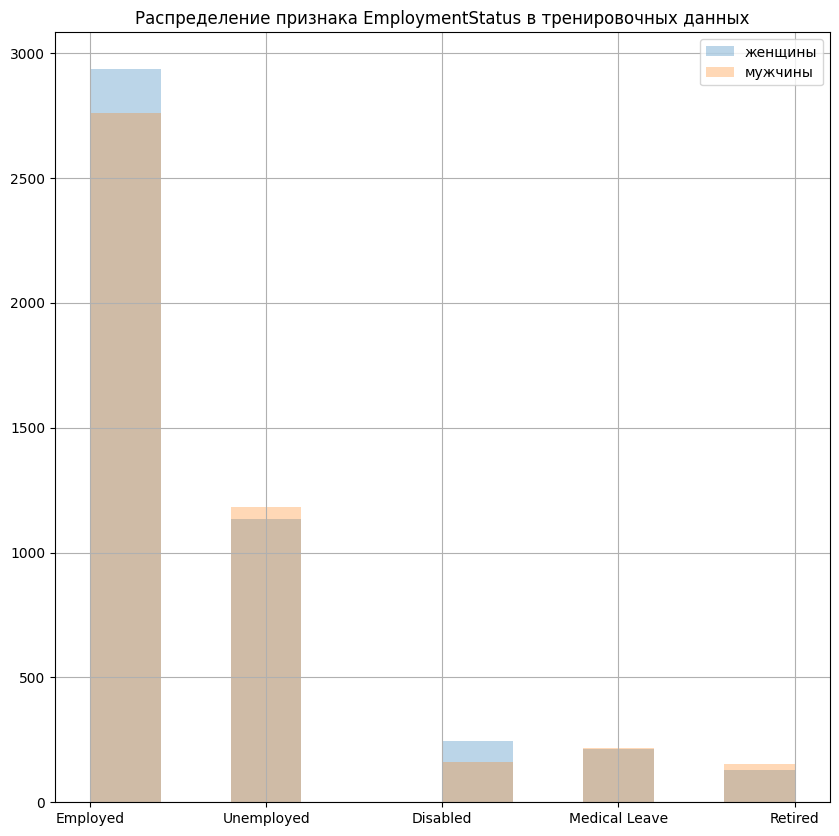

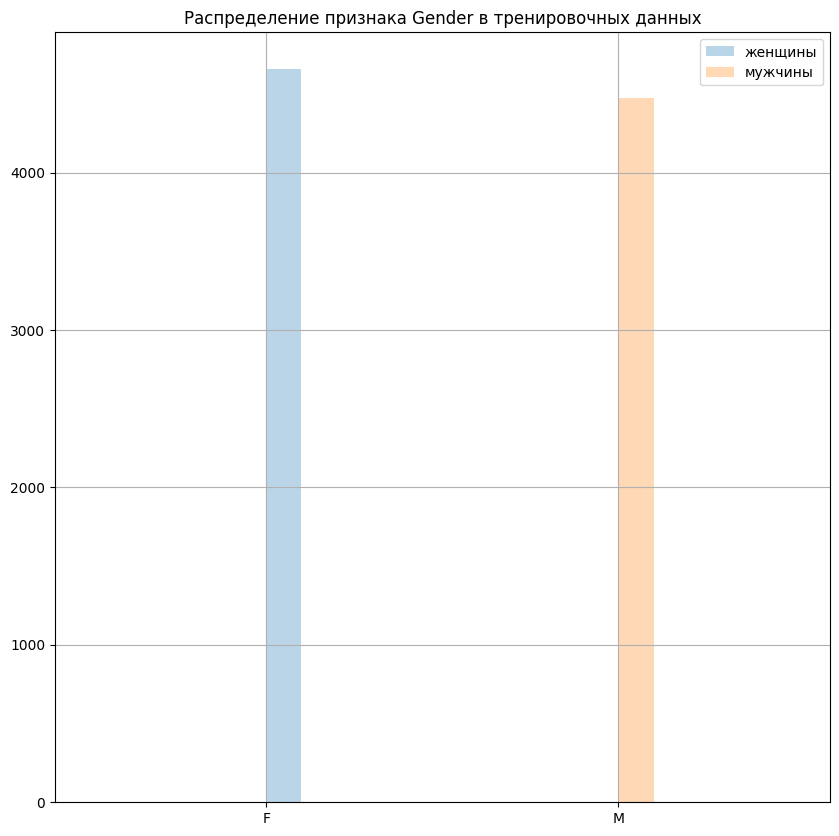

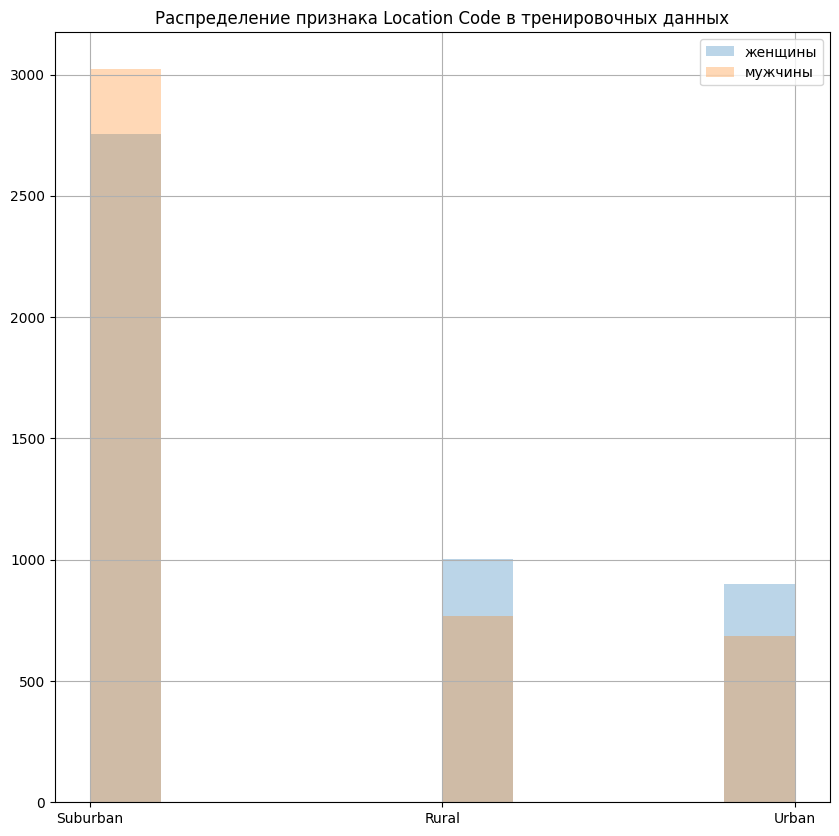

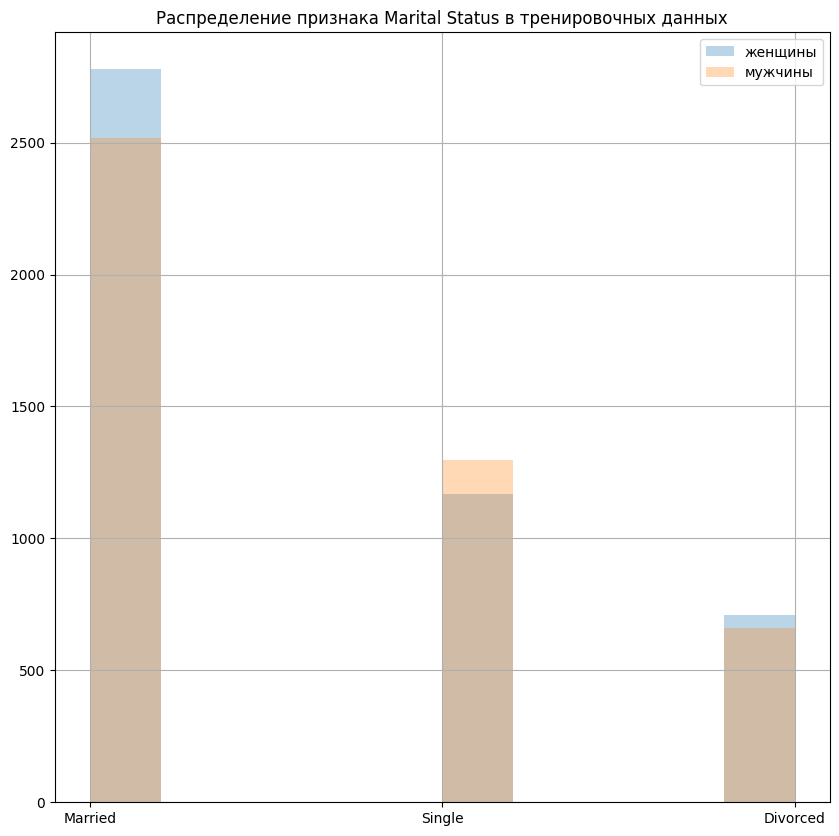

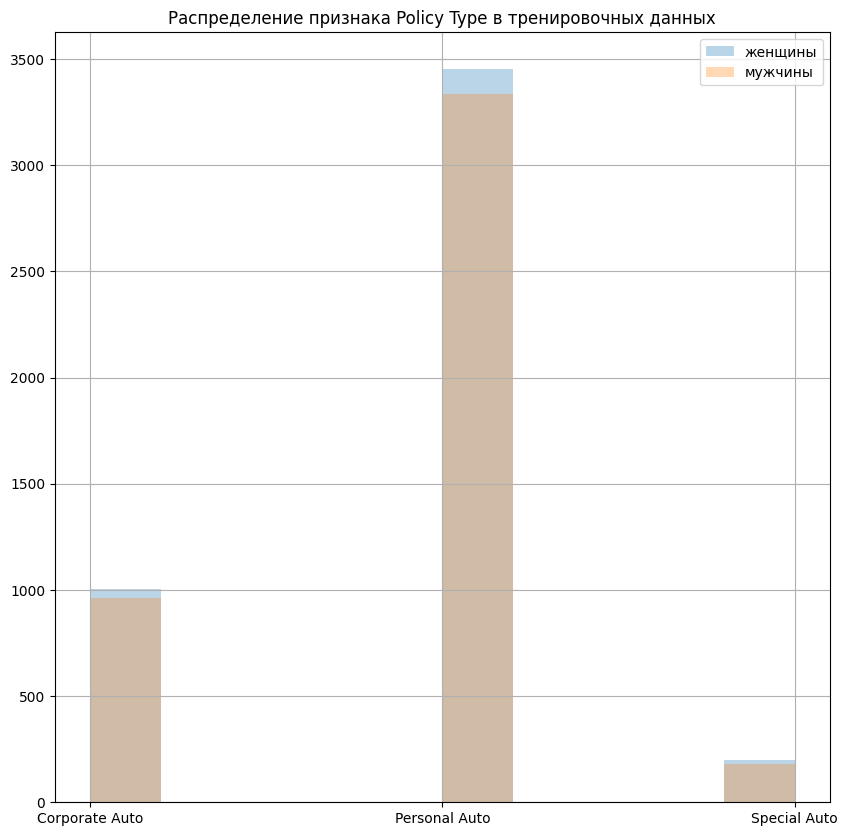

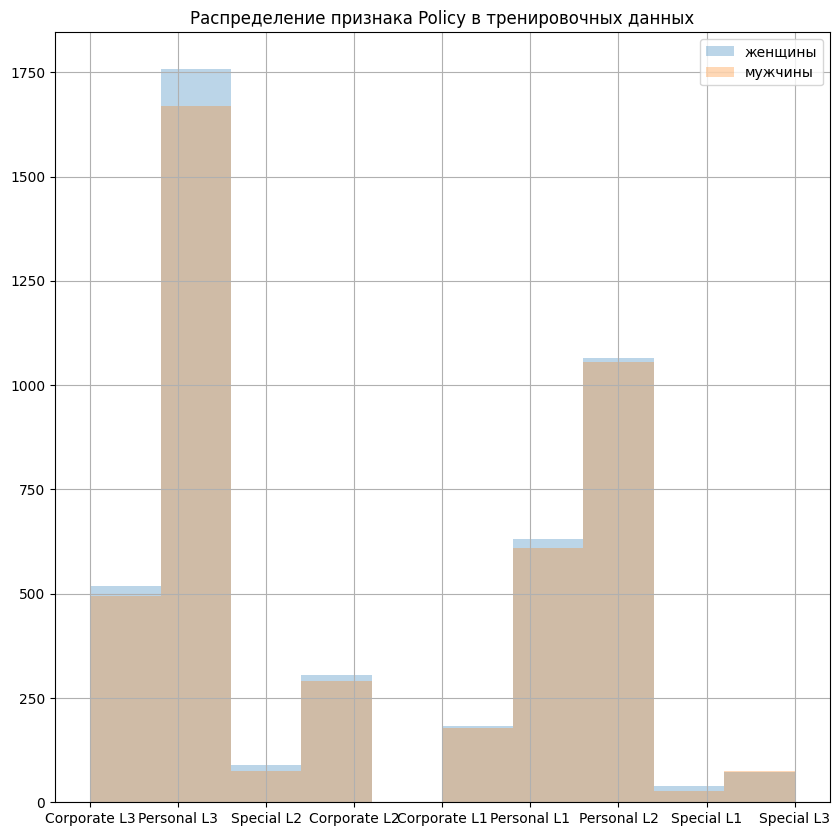

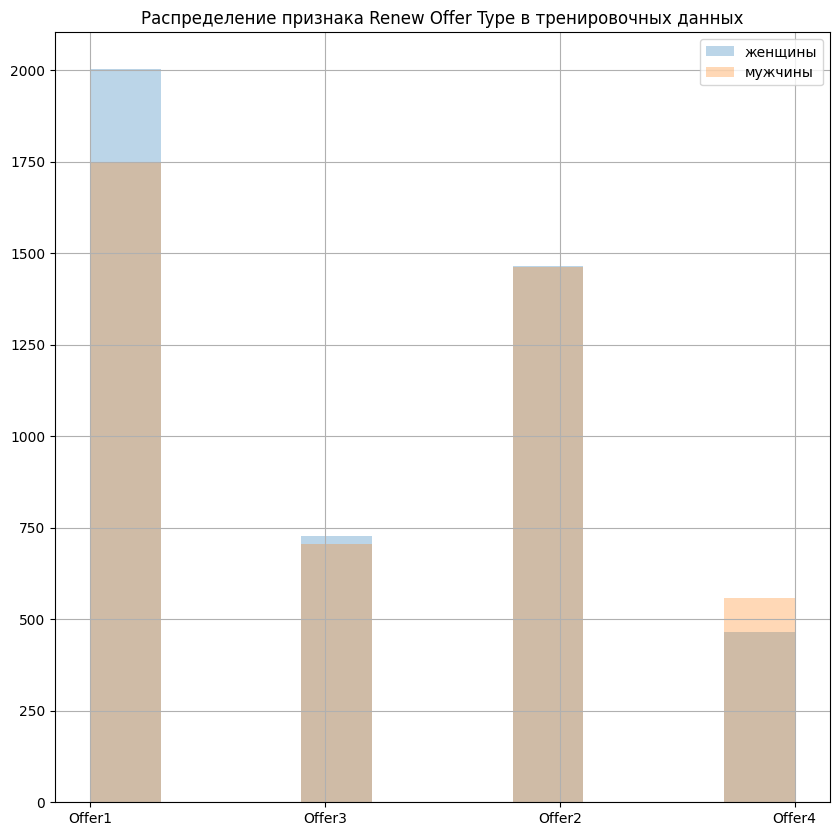

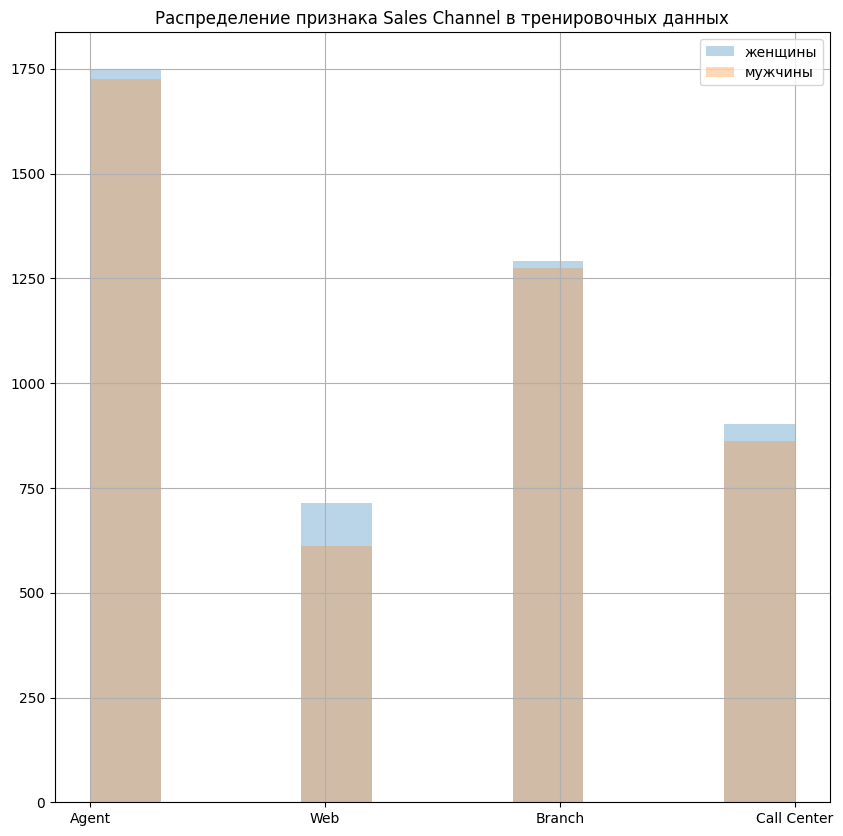

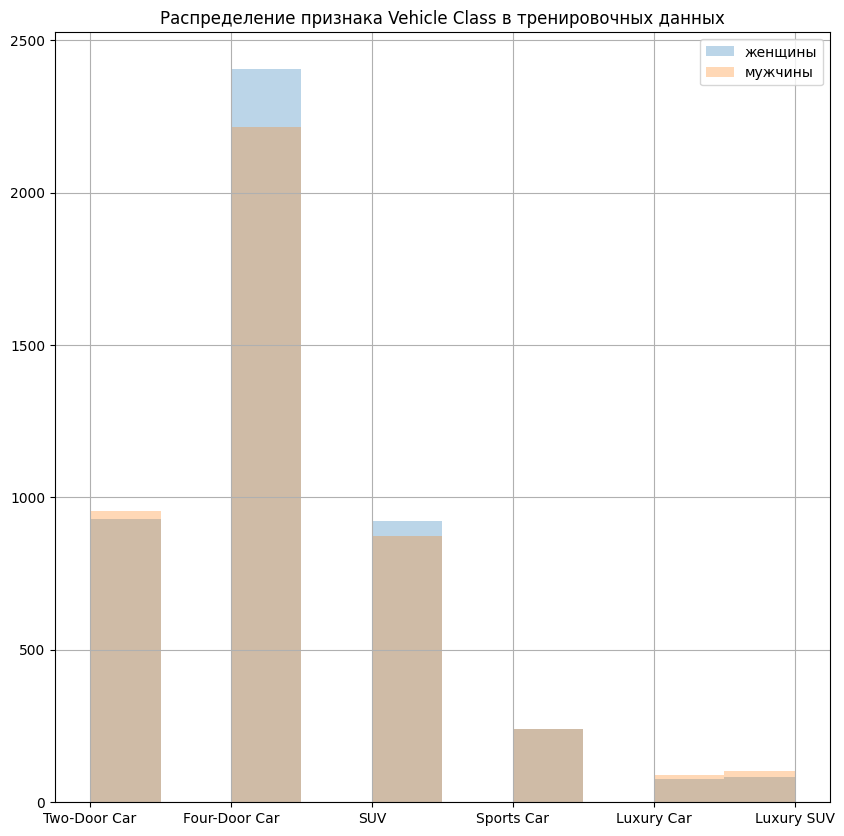

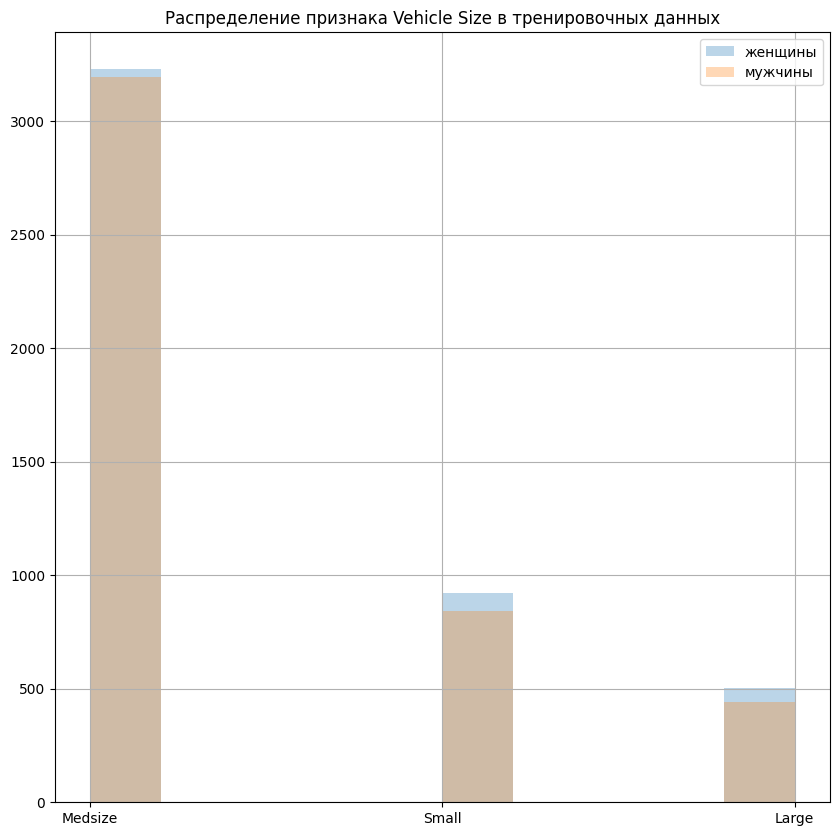

In [87]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    femaly[col].hist(label = 'женщины', alpha=0.3)
    man[col].hist(label = 'мужчины', alpha = 0.3)   
    plt.legend()

## Предобработка признаков

**Важно** Любое изменение признаков нужно делать и на тренировочной и на тестовой выборке

In [179]:
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(X, columns=['Gender', 'Response'])

# оставляем только код из номера
X["Customer"] = X.Customer.apply(lambda Item: Item[:2])
X["Count"] = X["Number of Open Complaints"] / X["Number of Policies"]
str_cols = []
cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] not in ('int64', 'float64'):
        str_cols.append(col)

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])        

X.sample(10)

,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Marital Status,Monthly Premium Auto,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Gender_F,Gender_M,Response_No,Response_Yes,Count
4295,142,0,1,3,56,1,57693,1,0,76,...,1,0,547.200000,0,1,1,0,0,1,0.000
8685,520,1,0,2,19,4,0,1,1,112,...,1,1,537.600000,4,1,1,0,1,0,0.125
6624,60,2,0,1,45,1,92381,2,1,72,...,1,2,234.774747,0,1,1,0,1,0,0.000
3303,51,3,0,1,46,2,10334,2,1,64,...,2,0,296.962938,0,1,0,1,1,0,0.000
2228,573,1,1,1,22,1,29598,0,2,87,...,3,2,150.926696,5,1,0,1,1,0,0.000
2343,494,2,1,3,21,4,0,1,2,93,...,2,0,669.600000,0,2,0,1,1,0,0.000
5699,142,3,2,3,5,4,0,1,2,256,...,2,0,1943.772393,1,1,1,0,1,0,0.000
1526,464,1,0,1,24,4,0,1,2,63,...,2,3,503.204804,0,1,1,0,1,0,0.000
7431,517,2,0,0,13,1,53957,0,1,184,...,0,1,61.554272,2,1,1,0,1,0,0.000
1256,560,3,1,2,50,1,28248,1,2,90,...,1,1,634.385937,0,2,1,0,1,0,0.000


In [180]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Корреляция признаков

Корреля́ция (от лат. correlatio «соотношение»), или корреляцио́нная зави́симость — статистическая взаимосвязь двух или более случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми). При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин **(с) Википедия**


**Корреляция** - величина показывающая связь двух и более величин. Существуют различные виды корреляций, мы не будем останавливаться на этом, для желающих разобраться ссылки на материалы в конце урока

**Корреляционная матрица** - квадратная матрица, элементы которой представляют собой корреляцию величин
В библиотеке `pandas.DataFrame` есть атрибут `corr()`, который считает корреляционную матрицу

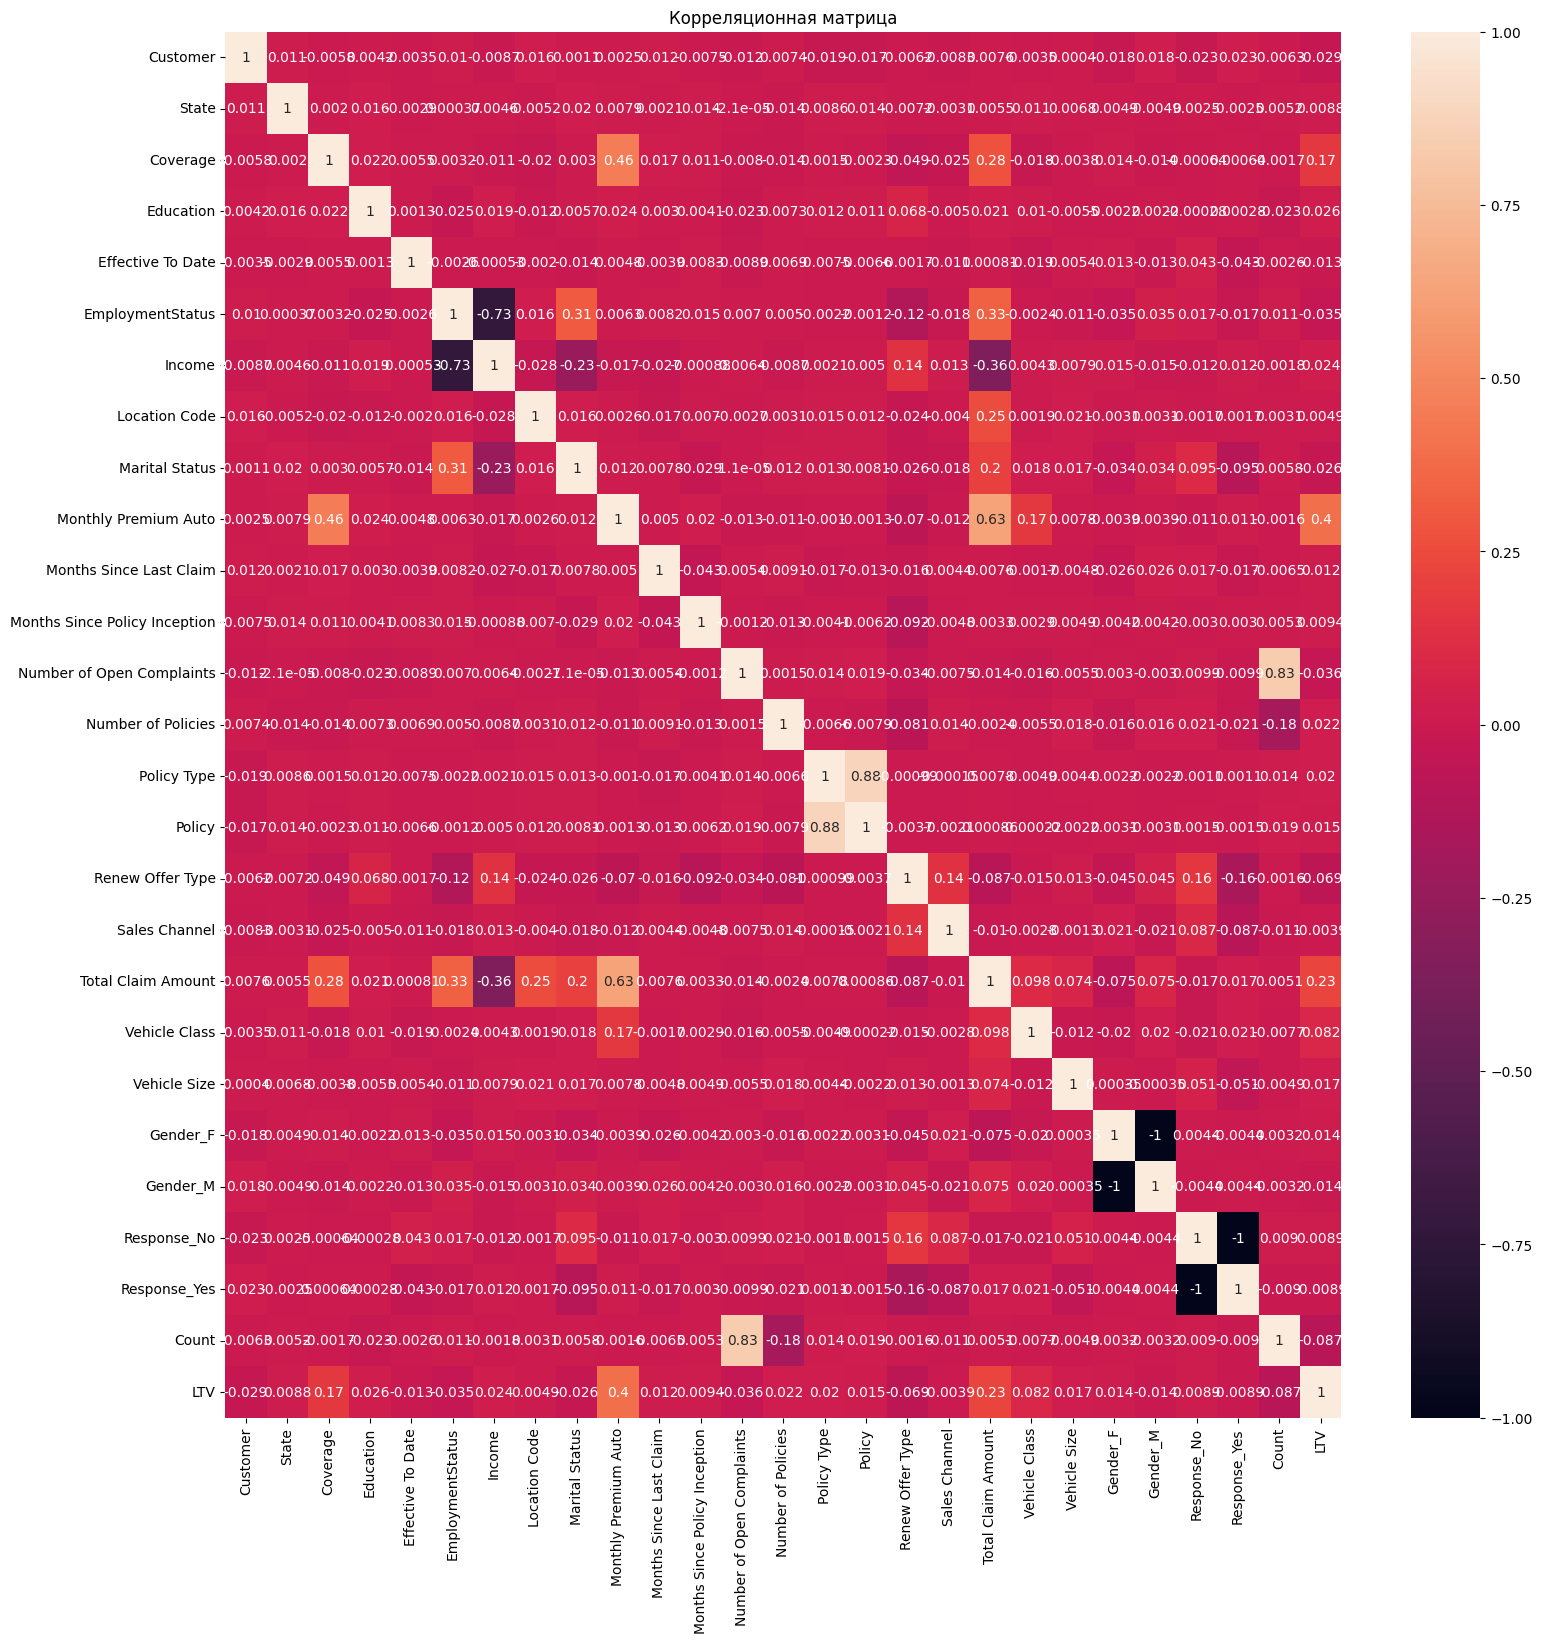

In [181]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['LTV'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [183]:
corr_m

,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Income,Location Code,Marital Status,Monthly Premium Auto,...,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Gender_F,Gender_M,Response_No,Response_Yes,Count,LTV
Customer,1.000000,0.011395,-0.005774,0.004155,-0.003522,0.010238,-0.008685,0.016451,0.001136,0.002480,...,-0.008280,0.007586,-0.003486,0.000401,-0.018379,0.018379,-0.023247,0.023247,-0.006326,-0.028631
State,0.011395,1.000000,0.002047,0.015755,-0.002864,0.000368,0.004620,-0.005240,0.020371,0.007898,...,-0.003080,0.005495,0.011407,0.006846,0.004933,-0.004933,0.002473,-0.002473,0.005194,0.008778
Coverage,-0.005774,0.002047,1.000000,0.021573,0.005482,0.003239,-0.010646,-0.020176,0.002956,0.458997,...,-0.024638,0.279078,-0.017682,-0.003775,0.014448,-0.014448,-0.000642,0.000642,-0.001749,0.168040
Education,0.004155,0.015755,0.021573,1.000000,0.001276,-0.025271,0.018709,-0.011533,0.005675,0.023952,...,-0.005018,0.020730,0.010192,-0.005491,-0.002206,0.002206,-0.000285,0.000285,-0.022673,0.026038
Effective To Date,-0.003522,-0.002864,0.005482,0.001276,1.000000,-0.002569,-0.000531,-0.001960,-0.014265,0.004844,...,-0.010888,0.000806,-0.019002,0.005368,0.013322,-0.013322,0.043133,-0.043133,-0.002585,-0.012978
EmploymentStatus,0.010238,0.000368,0.003239,-0.025271,-0.002569,1.000000,-0.726741,0.015921,0.311563,0.006269,...,-0.018346,0.330465,-0.002443,-0.011253,-0.034960,0.034960,0.016703,-0.016703,0.011378,-0.034846
Income,-0.008685,0.004620,-0.010646,0.018709,-0.000531,-0.726741,1.000000,-0.027517,-0.231673,-0.016665,...,0.013494,-0.355254,0.004343,0.007945,0.015138,-0.015138,-0.011932,0.011932,-0.001820,0.024366
Location Code,0.016451,-0.005240,-0.020176,-0.011533,-0.001960,0.015921,-0.027517,1.000000,0.016452,0.002631,...,-0.003953,0.254766,0.001870,0.021230,-0.003108,0.003108,-0.001729,0.001729,0.003143,0.004854
Marital Status,0.001136,0.020371,0.002956,0.005675,-0.014265,0.311563,-0.231673,0.016452,1.000000,0.012423,...,-0.017967,0.204675,0.017597,0.017493,-0.034027,0.034027,0.094843,-0.094843,0.005808,-0.026003
Monthly Premium Auto,0.002480,0.007898,0.458997,0.023952,0.004844,0.006269,-0.016665,0.002631,0.012423,1.000000,...,-0.011738,0.632017,0.169714,0.007768,-0.003918,0.003918,-0.010966,0.010966,-0.001633,0.396262


## Обучение различных моделей

Будем сравнивать между собой 3 модели: Логистическую регрессию, регрессор на решающем дереве, и бустинг

In [184]:
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state = 42, test_size = .2)

print(X_train.shape)
print(X_test.shape)

(7307, 26)
(1827, 26)


In [185]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

cv_lin_reg = cross_validate(lin_reg, X_train, y_train, cv = 5, scoring = 'r2')

lin_reg.fit(X_train, y_train)
predict = lin_reg.predict(X_test)

print(f"Результаты решающего дерева: {sum(cv_lin_reg['test_score']) / len(cv_lin_reg['test_score']):.4}, контроль {r2(y_test, predict):.4} несущественно отличается от cross_validate")

Результаты решающего дерева: 0.1718, контроль 0.164 несущественно отличается от cross_validate


In [186]:
# Решающее дерево
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_train, y_train, cv = 5, scoring = 'r2')

dec_tree.fit(X_train, y_train)
predict = dec_tree.predict(X_test)

print(f"Результаты решающего дерева: {sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']):.4}, контроль {r2(y_test, predict):.4} несущественно отличается от cross_validate")

Результаты решающего дерева: 0.4284, контроль 0.4812 несущественно отличается от cross_validate


In [187]:
# Бустинг с подбором гиперпараметров модели
from xgboost import XGBRegressor

parameters = {'objective':['reg:linear', 'reg:squarederror', 'reg:squaredlogerror'],
              'learning_rate': [.03, 0.05, .07, 0.1], 
              'max_depth': [5, 6, 7]}

xgb_reg = XGBRegressor(random_state = 42, objective = 'reg:linear', learning_rate = 0.07, max_depth = 6)

xgb_grid = GridSearchCV(xgb_reg, parameters)	
xgb_grid.fit(X_train, y_train)

print(f"лучший результат:{xgb_grid.best_score_}")
print(f"лучшие параметры:{xgb_grid.best_params_}")						

cv_xgb_reg = cross_validate(xgb_reg, X_train, y_train, cv = 5, scoring = 'r2')

xgb_reg.fit(X_train, y_train)
predict = xgb_reg.predict(X_test)

print(f"Результаты бустинга: {sum(cv_xgb_reg['test_score']) / len(cv_xgb_reg['test_score']):.4}, контроль {r2(y_test, predict):.4} несущественно отличается от cross_validate")

лучший результат:0.6962355912252964
лучшие параметры:{'learning_rate': 0.07, 'max_depth': 6, 'objective': 'reg:linear'}
Результаты бустинга: 0.6962, контроль 0.6748 несущественно отличается от cross_validate


Как видно, лучший результат показал бустинг.

## Интерпретация модели и важность признаков

Для того чтобы понять что заставляет пользователей уходить и оставаться, нужно понять влияние признаков. При работе с логистической регрессией можно использовать атрибут `coef_`

**Важно** атрибут `coef_` работает только когда метод `fit()` был явно вызван

In [188]:
lin_reg.fit(X, y)
print("Коэффициенты в линейной регрессии:", lin_reg.coef_)

Коэффициенты в линейной регрессии: [-1.00134705e+00  3.28902259e+01 -1.86049033e+02  9.05343633e+01
 -6.20092704e+00 -1.08956445e+02  1.84840052e-03  1.12276473e+02
 -2.31616947e+02  8.26233088e+01  5.73598641e+00 -5.64162122e-01
  1.00059124e+03 -3.68848041e+01  4.32550817e+02 -4.50809934e+01
 -3.28778347e+02  1.52412895e+01 -5.05167577e-01  4.76333300e+01
  1.90731455e+02  6.98033961e+01 -6.98033961e+01  2.29423057e+02
 -2.29423057e+02 -2.18252218e+03]


При работе с одним решающем дереве интерпретировать результаты достаточно просто, для этого есть атрибут `feature_importances_` Он показывает долю важности признака на целевую переменную

**Важно** атрибут `feature_importances_` работает только когда метод `fit()` был явно вызван

In [189]:
dec_tree.fit(X, y)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.03553382 0.00953493 0.00889764 0.01038173 0.03799087 0.00426126
 0.02516824 0.00210713 0.00320196 0.24720382 0.02860238 0.02711582
 0.00344237 0.47030031 0.0035441  0.01018529 0.00600622 0.00672883
 0.03520678 0.00566748 0.00429907 0.00187607 0.00269302 0.00510441
 0.00313744 0.00180901]


Некоторые типы моделей (например экстримально случайный лес и все что основано на бустинге) интерпретировать стандартными способами практически невозможно. 

Для интерпретации таких моделей можно использовать библиотеку `shap`, которая работает на основе ядра и вектора Шэпли - важнейших понятий в коалиционной теории игр

In [190]:
# Раскомментируйте чтобы установить 
#!pip install shap

In [191]:
import shap
# Загружаем JS шаблоны для визуализации
shap.initjs()

print("Обучили модель, переходим к визуализации")
# Интерпретируем предсказания модели при помощи SHAP
explainer = shap.TreeExplainer(dec_tree)
shap_values = explainer.shap_values(X)

Обучили модель, переходим к визуализации


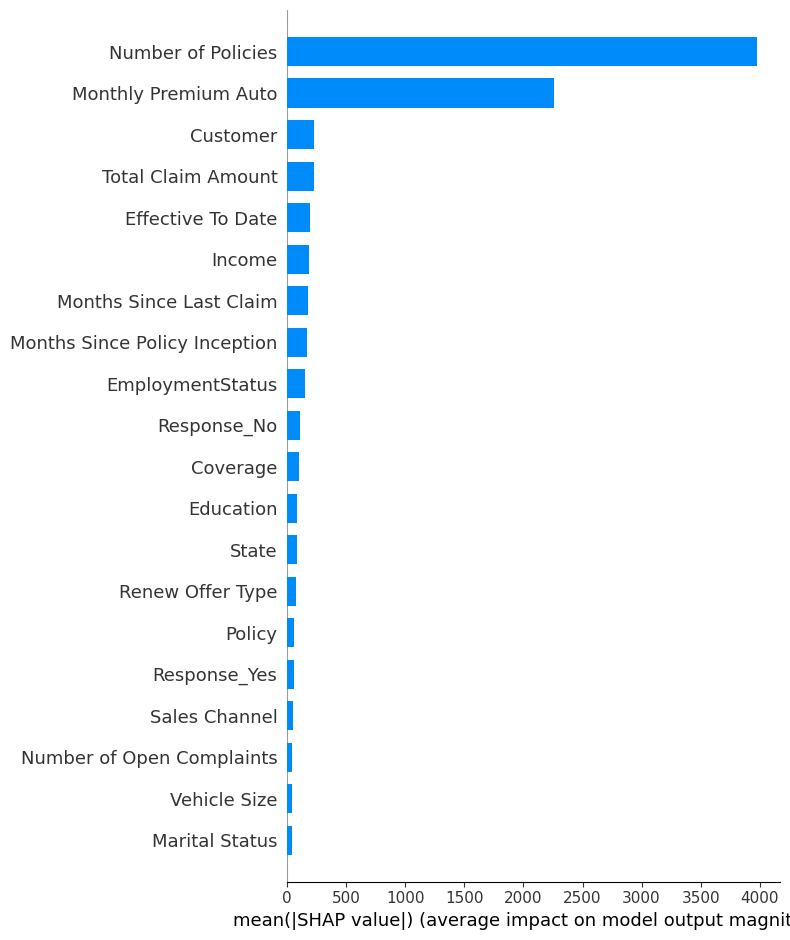

In [192]:
# Общий график
shap.summary_plot(shap_values, X, plot_type="bar")

## Вывод
LTV более всего зависит от количества страховых полисов у клиента, вероятно процесс пролонгации их большого количества кажется клиентам предпочтительнее нежели заключение новых договоров страхования.